# Setting everything up

In [1]:
import pandas as pd
from datetime import datetime


In [2]:
#import the file from the web
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unicodedata import normalize
import re
from datetime import datetime
from pandas import read_csv 
from sklearn.feature_extraction.text import CountVectorizer

# I can give a number or use None to remove maximum ceiling & display all columns
pd.options.display.max_columns = None

# # I want to be able to see the entire narrative, so remove the maximum width for each column
# pd.options.display.max_colwidth = None

pd.options.display.float_format = '{:,.2f}'.format

import string

%matplotlib inline

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 8)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
#To Download PDFs
from urllib.parse import urljoin


In [7]:
#To import camelot and PDF-related items
import camelot
import ghostscript
import sys

In [8]:
%%R

library(jpeg)
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)
library(tm)


R[write to console]: Loading required package: RColorBrewer

R[write to console]: Loading required package: NLP

R[write to console]: 
Attaching package: ‘NLP’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    annotate




In [9]:
# !pip install -U scikit-learn scipy matplotlib


In [10]:
from sklearn.feature_extraction.text import CountVectorizer


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Setting up Spotify Python package 

### Because the spotify api on its own can only pull 100 out of 215 songs

In [12]:
# !install spotipy
# !pip install spotipy

In [13]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Resources:
https://towardsdatascience.com/extracting-song-data-from-the-spotify-api-using-python-b1e79388d50 <br />
Use Spotify python package instead of API because API only got 100 tracks and I need 215
Here I get a list of the track IDs and track names which will be helpful in later getting the valence for each

In [14]:
BASE_URL = 'https://api.spotify.com/v1/'
playlist_id = '4lhWxULgawAPOEgAkClW0b'


In [15]:
cid='INSERT ID'
secret='INSERT ID'

In [16]:
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [17]:
playlist_link = "https://open.spotify.com/playlist/4lhWxULgawAPOEgAkClW0b"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]

In [18]:
def get_playlist_tracks(playlist_URI):
    results = sp.playlist_tracks(playlist_URI)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [19]:
length_of_playlist = len(get_playlist_tracks(playlist_URI))

print("number of tracks: ", length_of_playlist)

list_of_tracks = []
for track in range(0, length_of_playlist-1):
    track_name = get_playlist_tracks(playlist_URI)[track]['track']['name']
    print(track+1, track_name)
    list_of_tracks.append(track_name)
list_of_tracks

number of tracks:  215
1 Afghanistan [Milli Surood (National Anthem), "This land is Afghanistan…"] (2006 onwards)
2 Albania [Hymni i Flamurit (Hymn To The Flag), "The flag which in battle unites us…"]
3 Algeria ["We swear by the lightning that destroys…"] (Olympic version)
4 American Samoa ["America Samoa, my dear beloved land…"] (Olympic version)
5 Andorra [Himne Andorra (Andorra Hymn), "The great Charlemagne, my Father…"] (Olympic version)
6 Angola: Angola ["O Fatherland, we shall never forget the heroes of the Fourth of February…"]
7 Anguilla [National Song, "God bless Anguilla nurture…"]
8 Antigua and Barbuda ["Fair Antigua, we salute thee!…"]
9 Argentina [Himno Nacional Argentino (Argentine National Anthem), "Mortals! Hear the sacred cry…"] (short)
10 Armenia [Mer Hayrenik (Our Fatherland), "Land of our fathers, free, independent…"]
11 Aruba: Aruba [Aruba Deshi Tera (Aruba Precious Country), "Aruba, beloved home…"]
12 Australia [Advance Australia Fair, "Australians all, let us rej

102 Korea, South: Aegukga (Patriotic Hymn), "Tong-Hai Sea and Pakdoo Mountain…" [2005 arrangement]
103 Kosovo: Europe
104 Kurdistan: Ey Reqib (Hey Guard), "Oh enemy Kurdish people live on…" [short version]
105 Kuwait: "Kuwait, Kuwait, Kuwait, my country…" (arr. P. Breiner)
106 Kyrgyzstan: "High mountains, valleys and fields…" (Olympic version) [arr. P. Breiner]
107 Laos: Pheng Xat Lao (Hymn of the Lao People), "For all time the Lao people…" [arr. P. Breiner]
108 Latvia: Latvijas Valsts Himna (Latvian State Anthem), "Bless Latvia, O God…" [Olympic version] [arr. P. Breiner]
109 Lebanon: "All of us! For our Country, for our Flag and Glory!…"
110 Lesotho: "Lesotho, land of our Fathers, you are the most beautiful country of all…" (arr. P. Breiner)
111 Liberia: Liberian Anthem, "All hail, Liberia, hail!…"
112 Libya: Libya, Libya, Libya, "Oh my country" (2011 onwards) [short version]
113 Liechtenstein: "High above the young Rhine lies Liechtenstein…"
114 Lithuania: Tautiška giesmė (National 

193 Tonga: Tonga [Ko e fasi 'o e 'Otu Tonga (Song of the King of the Tonga Islands), "Oh, Almighty God above"]
194 Trinidad and Tobago: "Forged from the love of liberty…" (arr. P. Breiner)
195 Tunisia: O Defenders of the Homeland!… (arr. P. Breiner)
196 Turkey: İstiklâl Marşı (Independence March), "Fear not and be not dismayed…" [arr. P. Breiner]
197 Turkmenistan: Independent Neutral Turkmenistan State Anthem, "I am ready to give life for native hearth…" (2008 onwards)
198 Turks and Caicos Islands: God Save the Queen, "God save our gracious Queen…" (Royal) [arr. P. Breiner]
199 Uganda: Pearl of Africa, "Oh Uganda! may God upload thee…" (short version) [arr. P. Breiner]
200 Ukraine: "Ukraine's glory hasn't perished, nor her freedom…" (Olympic version) [arr. P. Breiner]
201 United Arab Emirates: "Live my country, the unity of our Emirates lives…" (arr. P. Breiner)
202 United States of America: The Star-Spangled Banner, "O say, can you see…" (arr. P. Breiner)
203 Uruguay: "Eastern landsme

['Afghanistan [Milli Surood (National Anthem), "This land is Afghanistan…"] (2006 onwards)',
 'Albania [Hymni i Flamurit (Hymn To The Flag), "The flag which in battle unites us…"]',
 'Algeria ["We swear by the lightning that destroys…"] (Olympic version)',
 'American Samoa ["America Samoa, my dear beloved land…"] (Olympic version)',
 'Andorra [Himne Andorra (Andorra Hymn), "The great Charlemagne, my Father…"] (Olympic version)',
 'Angola: Angola ["O Fatherland, we shall never forget the heroes of the Fourth of February…"]',
 'Anguilla [National Song, "God bless Anguilla nurture…"]',
 'Antigua and Barbuda ["Fair Antigua, we salute thee!…"]',
 'Argentina [Himno Nacional Argentino (Argentine National Anthem), "Mortals! Hear the sacred cry…"] (short)',
 'Armenia [Mer Hayrenik (Our Fatherland), "Land of our fathers, free, independent…"]',
 'Aruba: Aruba [Aruba Deshi Tera (Aruba Precious Country), "Aruba, beloved home…"]',
 'Australia [Advance Australia Fair, "Australians all, let us rejoice

In [20]:
df=pd.DataFrame()
df['anthem'] = list_of_tracks

In [21]:
df

anthem
0    Afghanistan [Milli Surood (National Anthem), "...
1    Albania [Hymni i Flamurit (Hymn To The Flag), ...
2    Algeria ["We swear by the lightning that destr...
3    American Samoa ["America Samoa, my dear belove...
4    Andorra [Himne Andorra (Andorra Hymn), "The gr...
..                                                 ...
209  Yemen: "Repeat, O World, my song…" (2005 arran...
210  Zambia: "Stand and sing of Zambia, proud and f...
211  Zimbabwe: Kalibusiswe Ilizwe LeZimbabwe (Bless...
212  United Nations: Hymn to the United Nations, "E...
213  Olympic Movement: Olympiakós Ýmnos (Olympic Hy...

[214 rows x 1 columns]

In [22]:
length_of_playlist = len(get_playlist_tracks(playlist_URI))

print("number of tracks: ", length_of_playlist)

list_of_tracks = []
for track in range(0, length_of_playlist-1):
    track_details = get_playlist_tracks(playlist_URI)[track]['track']
    print(track+1, track_details)
    list_of_tracks.append(track_details)
list_of_tracks

number of tracks:  215
1 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 

3 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO',

5 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO',

7 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO',

9 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO',

11 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO'

13 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO'

15 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO'

17 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO'

19 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO'

21 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

23 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

25 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

27 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

29 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

31 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

33 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

35 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

37 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

39 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

41 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/1qNa6AMS3ILdM4cWkdFKOz'}, 'href': 'https://api.spotify.com/v1/artists/1qNa6AMS3ILdM4cWkdFKOz', 'id': '1qNa6AMS3ILdM4cWkdFKOz', 'name': 'Slovak State Philharmonic, Košice', 'type': 'artist', 'uri': 'spotify:artist:1qNa6AMS3ILdM4cWkdFKOz'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'A

43 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/1qNa6AMS3ILdM4cWkdFKOz'}, 'href': 'https://api.spotify.com/v1/artists/1qNa6AMS3ILdM4cWkdFKOz', 'id': '1qNa6AMS3ILdM4cWkdFKOz', 'name': 'Slovak State Philharmonic, Košice', 'type': 'artist', 'uri': 'spotify:artist:1qNa6AMS3ILdM4cWkdFKOz'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'A

45 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/1qNa6AMS3ILdM4cWkdFKOz'}, 'href': 'https://api.spotify.com/v1/artists/1qNa6AMS3ILdM4cWkdFKOz', 'id': '1qNa6AMS3ILdM4cWkdFKOz', 'name': 'Slovak State Philharmonic, Košice', 'type': 'artist', 'uri': 'spotify:artist:1qNa6AMS3ILdM4cWkdFKOz'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'A

47 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/1qNa6AMS3ILdM4cWkdFKOz'}, 'href': 'https://api.spotify.com/v1/artists/1qNa6AMS3ILdM4cWkdFKOz', 'id': '1qNa6AMS3ILdM4cWkdFKOz', 'name': 'Slovak State Philharmonic, Košice', 'type': 'artist', 'uri': 'spotify:artist:1qNa6AMS3ILdM4cWkdFKOz'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'A

49 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/1qNa6AMS3ILdM4cWkdFKOz'}, 'href': 'https://api.spotify.com/v1/artists/1qNa6AMS3ILdM4cWkdFKOz', 'id': '1qNa6AMS3ILdM4cWkdFKOz', 'name': 'Slovak State Philharmonic, Košice', 'type': 'artist', 'uri': 'spotify:artist:1qNa6AMS3ILdM4cWkdFKOz'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'A

51 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/1qNa6AMS3ILdM4cWkdFKOz'}, 'href': 'https://api.spotify.com/v1/artists/1qNa6AMS3ILdM4cWkdFKOz', 'id': '1qNa6AMS3ILdM4cWkdFKOz', 'name': 'Slovak State Philharmonic, Košice', 'type': 'artist', 'uri': 'spotify:artist:1qNa6AMS3ILdM4cWkdFKOz'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'A

53 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/1qNa6AMS3ILdM4cWkdFKOz'}, 'href': 'https://api.spotify.com/v1/artists/1qNa6AMS3ILdM4cWkdFKOz', 'id': '1qNa6AMS3ILdM4cWkdFKOz', 'name': 'Slovak State Philharmonic, Košice', 'type': 'artist', 'uri': 'spotify:artist:1qNa6AMS3ILdM4cWkdFKOz'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'A

55 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/1qNa6AMS3ILdM4cWkdFKOz'}, 'href': 'https://api.spotify.com/v1/artists/1qNa6AMS3ILdM4cWkdFKOz', 'id': '1qNa6AMS3ILdM4cWkdFKOz', 'name': 'Slovak State Philharmonic, Košice', 'type': 'artist', 'uri': 'spotify:artist:1qNa6AMS3ILdM4cWkdFKOz'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'A

57 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/1qNa6AMS3ILdM4cWkdFKOz'}, 'href': 'https://api.spotify.com/v1/artists/1qNa6AMS3ILdM4cWkdFKOz', 'id': '1qNa6AMS3ILdM4cWkdFKOz', 'name': 'Slovak State Philharmonic, Košice', 'type': 'artist', 'uri': 'spotify:artist:1qNa6AMS3ILdM4cWkdFKOz'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'A

59 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/1qNa6AMS3ILdM4cWkdFKOz'}, 'href': 'https://api.spotify.com/v1/artists/1qNa6AMS3ILdM4cWkdFKOz', 'id': '1qNa6AMS3ILdM4cWkdFKOz', 'name': 'Slovak State Philharmonic, Košice', 'type': 'artist', 'uri': 'spotify:artist:1qNa6AMS3ILdM4cWkdFKOz'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'A

61 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/1qNa6AMS3ILdM4cWkdFKOz'}, 'href': 'https://api.spotify.com/v1/artists/1qNa6AMS3ILdM4cWkdFKOz', 'id': '1qNa6AMS3ILdM4cWkdFKOz', 'name': 'Slovak State Philharmonic, Košice', 'type': 'artist', 'uri': 'spotify:artist:1qNa6AMS3ILdM4cWkdFKOz'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'A

63 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

65 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

67 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

69 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

71 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

73 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

75 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

77 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

79 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

81 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

83 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

85 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

87 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

89 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

91 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

93 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

95 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

97 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

99 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 

101 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

103 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

105 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

107 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

109 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

111 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

113 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': [], 'external_urls': {'spotify': 'https://

116 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': [], 'external_urls': {'spotify': 'https://

119 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': [], 'external_urls': {'spotify': 'https://

122 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': [], 'external_urls': {'spotify': 'https://

125 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': [], 'external_urls': {'spotify': 'https://

128 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': [], 'external_urls': {'spotify': 'https://

131 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': [], 'external_urls': {'spotify': 'https://

134 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': [], 'external_urls': {'spotify': 'https://

136 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

138 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

140 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

142 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

144 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

146 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

148 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

150 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': [], 'external_urls': {'spotify': '

153 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': [], 'external_urls': {'spotify': '

156 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': [], 'external_urls': {'spotify': '

159 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': [], 'external_urls': {'spotify': '

162 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': [], 'external_urls': {'spotify': '

165 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': [], 'external_urls': {'spotify': '

168 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': [], 'external_urls': {'spotify': '

170 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO

172 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO

174 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO

176 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO

178 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO

180 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO

182 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO

184 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO

186 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO

188 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO

190 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO

192 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'}, 'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6', 'id': '2Eo4VORMdwb15W8WZh3vl6', 'name': 'Slovak State Philharmonic Orchestra, Kosice', 'type': 'artist', 'uri': 'spotify:artist:2Eo4VORMdwb15W8WZh3vl6'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO

194 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

196 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

198 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

200 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

202 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

204 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

206 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

208 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

210 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

212 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

214 {'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'}, 'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D', 'id': '428GNN7qZnTsMaK3SfPo6D', 'name': 'Slovak Radio Symphony Orchestra', 'type': 'artist', 'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0QEqho8rz1k9XpFcHfOlZp'}, 'href': 'https://api.spotify.com/v1/artists/0QEqho8rz1k9XpFcHfOlZp', 'id': '0QEqho8rz1k9XpFcHfOlZp', 'name': 'Slovak State Philharmonic Orchestra', 'type': 'artist', 'uri': 'spotify:artist:0QEqho8rz1k9XpFcHfOlZp'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'}, 'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su', 'id': '50MREZ0LJcSvrtKuyTV8Su', 'name': 'Peter Breiner', 'type': 'artist', 'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR',

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/50MREZ0LJcSvrtKuyTV8Su'},
     'href': 'https://api.spotify.com/v1/artists/50MREZ0LJcSvrtKuyTV8Su',
     'id': '50MREZ0LJcSvrtKuyTV8Su',
     'name': 'Peter Breiner',
     'type': 'artist',
     'uri': 'spotify:artist:50MREZ0LJcSvrtKuyTV8Su'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/428GNN7qZnTsMaK3SfPo6D'},
     'href': 'https://api.spotify.com/v1/artists/428GNN7qZnTsMaK3SfPo6D',
     'id': '428GNN7qZnTsMaK3SfPo6D',
     'name': 'Slovak Radio Symphony Orchestra',
     'type': 'artist',
     'uri': 'spotify:artist:428GNN7qZnTsMaK3SfPo6D'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/2Eo4VORMdwb15W8WZh3vl6'},
     'href': 'https://api.spotify.com/v1/artists/2Eo4VORMdwb15W8WZh3vl6',
     'id': '2Eo4VORMdwb15W8WZh3vl6',
     'name': 'Slovak State Philharmonic Orchestra, Kosice',
     'type': 'artist',
     'uri': 'spotify:artist

In [23]:
length_of_playlist = len(get_playlist_tracks(playlist_URI))

print("number of tracks: ", length_of_playlist)

track_info=[]
list_of_ids = []

for track in range(0, length_of_playlist-1):
    track_id = get_playlist_tracks(playlist_URI)[track]['track']['id']
    track_name = get_playlist_tracks(playlist_URI)[track]['track']['name']
    
    my_object = {
        "track_id": track_id,
        "track_name": track_name
    }
    track_info.append(my_object)
#     print(track+1, track_id)
    list_of_ids.append(track_id)
list_of_ids
track_info

number of tracks:  215


[{'track_id': '4FfTEj2bSFa2ptNoxbkOnP',
  'track_name': 'Afghanistan [Milli Surood (National Anthem), "This land is Afghanistan…"] (2006 onwards)'},
 {'track_id': '0J7T6WhEvtTTqvx4RRjpbq',
  'track_name': 'Albania [Hymni i Flamurit (Hymn To The Flag), "The flag which in battle unites us…"]'},
 {'track_id': '05kY0EH7nF6Esa4yn0Mjsn',
  'track_name': 'Algeria ["We swear by the lightning that destroys…"] (Olympic version)'},
 {'track_id': '2hSwZOmc50GYJeOXe4C7vH',
  'track_name': 'American Samoa ["America Samoa, my dear beloved land…"] (Olympic version)'},
 {'track_id': '74NggutKEKI9FIMonXgRMi',
  'track_name': 'Andorra [Himne Andorra (Andorra Hymn), "The great Charlemagne, my Father…"] (Olympic version)'},
 {'track_id': '7hrCjUIObTQcDhUe4GzkCI',
  'track_name': 'Angola: Angola ["O Fatherland, we shall never forget the heroes of the Fourth of February…"]'},
 {'track_id': '3nLWkTgKFm9GPMlrPo4i2u',
  'track_name': 'Anguilla [National Song, "God bless Anguilla nurture…"]'},
 {'track_id': '2NR

In [24]:
# df=pd.DataFrame()
# df['anthem'] = list_of_tracks
# df

In [25]:
df_track_info=pd.DataFrame(track_info)
df_track_info

track_id                                         track_name
0    4FfTEj2bSFa2ptNoxbkOnP  Afghanistan [Milli Surood (National Anthem), "...
1    0J7T6WhEvtTTqvx4RRjpbq  Albania [Hymni i Flamurit (Hymn To The Flag), ...
2    05kY0EH7nF6Esa4yn0Mjsn  Algeria ["We swear by the lightning that destr...
3    2hSwZOmc50GYJeOXe4C7vH  American Samoa ["America Samoa, my dear belove...
4    74NggutKEKI9FIMonXgRMi  Andorra [Himne Andorra (Andorra Hymn), "The gr...
..                      ...                                                ...
209  7hGeCeMkGchfV6Y37lCPix  Yemen: "Repeat, O World, my song…" (2005 arran...
210  22n9XZJAuh8px5XoUo7vn1  Zambia: "Stand and sing of Zambia, proud and f...
211  4V7hADnXZWrimlEidbh9S8  Zimbabwe: Kalibusiswe Ilizwe LeZimbabwe (Bless...
212  6aTkj5V4xf8ZhW04diIet1  United Nations: Hymn to the United Nations, "E...
213  4ylVg9Pxvf2FXyo5uqhZj0  Olympic Movement: Olympiakós Ýmnos (Olympic Hy...

[214 rows x 2 columns]

In [26]:
# type(list_of_tracks)

# for track in list_of_tracks:
#     print (type(track))

# Now ready to start getting singular track details 

### Especially valence, which can tell me the mood of national anthems around the world
#### Here is a reference guide for the audio features API which has valence: 
https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features


In [27]:
#when posting online use the below so that you hide personal details
# CLIENT_ID = 'INSERT_YOUR_ID'
# CLIENT_SECRET = 'INSERT_YOUR_SECRET'




In [28]:
AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [29]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [30]:
# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

# base URL of all Spotify API playlists
BASE_URL_PLAYLISTS = BASE_URL+'playlists/'

# Track ID from the URI
playlist_id = '4lhWxULgawAPOEgAkClW0b'

# actual GET request with proper header
r = requests.get(BASE_URL_PLAYLISTS + playlist_id, headers=headers)


In [31]:
#this is an example of result for one track ID
f = requests.get(BASE_URL + 'audio-features/' + list_of_ids[0], 
    headers=headers)
f = f.json()

f

{'danceability': 0.385,
 'energy': 0.331,
 'key': 3,
 'loudness': -13.635,
 'mode': 1,
 'speechiness': 0.033,
 'acousticness': 0.798,
 'instrumentalness': 0.982,
 'liveness': 0.12,
 'valence': 0.609,
 'tempo': 125.866,
 'type': 'audio_features',
 'id': '4FfTEj2bSFa2ptNoxbkOnP',
 'uri': 'spotify:track:4FfTEj2bSFa2ptNoxbkOnP',
 'track_href': 'https://api.spotify.com/v1/tracks/4FfTEj2bSFa2ptNoxbkOnP',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4FfTEj2bSFa2ptNoxbkOnP',
 'duration_ms': 97160,
 'time_signature': 4}

# For each Spotify track specifically

### Source:
I got a lot of support for this section from looking at [LUIZ FERNANDO TOLEDO's analysis of Iron Maiden songs](
https://github.com/luizftoledo/luizftoledo.github.io/blob/main/iron-maiden-happiness/docs/data_analysis_maiden.ipynb)

In [32]:
# Creating a list of dictionaires that contains every song, audio features 
# OBS: popularity and song features are in different parts of the API, so we need to make two different requests.
# audio features like danceability were extracted from BASE_URL + audio_features/ + track id
# track popularity was extracted from BASE_URL + tracks/ + track_id)

data = []   # will hold all track info
# albums = [] # to keep track of duplicates
track_info = []

f_list = []

for track_id in list_of_ids:
    #         print(track['name'])
    # get audio features (key, liveness, danceability, ...)
    f = requests.get(BASE_URL + 'audio-features/' + track_id, 
        headers=headers)
#     f2 = requests.get(BASE_URL + 'tracks/' + track_id, 
#         headers=headers)
    f = f.json()
    f_list.append(f)
#     f2 = f2.json()
#     print('song name:' + track['name'] + ' and popularity: '+ str(f2['popularity']))
    #         print(f'a')
#     my_object = {
# #         "name": track['name'],
# #         "album_name": f2['album']['name'],
# #         "popularity": f2["popularity"],
# #         'release_date': f2['album']['release_date'],
#         "valence": f["valence"],
#         "danceability": f['danceability'],
#         "energy": f['energy'],
#         "danceability": f['danceability'],
#         "key": f['key'],
#         "loudness": f['loudness'],
#         "mode": f['mode'],
#         "speechiness": f['speechiness'],
#         "danceability": f['danceability'],
#         "acousticness": f['acousticness'],
#         "instrumentalness": f['instrumentalness'],
#         "liveness": f['liveness'],
#         "tempo": f['tempo'],
#         "duration_ms": f['duration_ms'],
#         "danceability": f['danceability']
#                 }

#     track_info.append(my_object)
#     #         data.append(f)
f_list


[{'danceability': 0.385,
  'energy': 0.331,
  'key': 3,
  'loudness': -13.635,
  'mode': 1,
  'speechiness': 0.033,
  'acousticness': 0.798,
  'instrumentalness': 0.982,
  'liveness': 0.12,
  'valence': 0.609,
  'tempo': 125.866,
  'type': 'audio_features',
  'id': '4FfTEj2bSFa2ptNoxbkOnP',
  'uri': 'spotify:track:4FfTEj2bSFa2ptNoxbkOnP',
  'track_href': 'https://api.spotify.com/v1/tracks/4FfTEj2bSFa2ptNoxbkOnP',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4FfTEj2bSFa2ptNoxbkOnP',
  'duration_ms': 97160,
  'time_signature': 4},
 {'danceability': 0.42,
  'energy': 0.124,
  'key': 7,
  'loudness': -18.274,
  'mode': 1,
  'speechiness': 0.0453,
  'acousticness': 0.969,
  'instrumentalness': 0.937,
  'liveness': 0.0772,
  'valence': 0.307,
  'tempo': 98.616,
  'type': 'audio_features',
  'id': '0J7T6WhEvtTTqvx4RRjpbq',
  'uri': 'spotify:track:0J7T6WhEvtTTqvx4RRjpbq',
  'track_href': 'https://api.spotify.com/v1/tracks/0J7T6WhEvtTTqvx4RRjpbq',
  'analysis_url': 'https://api.

In [33]:
df_f_track_details=pd.DataFrame(f_list)
df_f_track_details

danceability  energy   key  loudness  mode  speechiness  acousticness  \
0            0.39    0.33  3.00    -13.63  1.00         0.03          0.80   
1            0.42    0.12  7.00    -18.27  1.00         0.05          0.97   
2            0.46    0.61  5.00    -13.71  1.00         0.05          0.86   
3            0.25    0.30 10.00    -15.65  1.00         0.04          0.90   
4            0.54    0.21  2.00    -17.32  1.00         0.04          0.84   
..            ...     ...   ...       ...   ...          ...           ...   
209          0.32    0.11  5.00    -17.03  1.00         0.03          0.94   
210          0.29    0.24  7.00    -14.96  1.00         0.03          0.84   
211          0.17    0.27  7.00    -15.24  1.00         0.04          0.75   
212          0.24    0.13 10.00    -15.52  1.00         0.03          0.90   
213          0.20    0.30  5.00    -13.52  1.00         0.04          0.75   

     instrumentalness  liveness  valence  tempo            type  \
0                0.98      0.12     0.61 125.87  audio_features   
1                0.94      0.08     0.31  98.62  audio_features   
2                0.94      0.21     0.43 127.96  audio_features   
3                0.98      0.09     0.73  81.43  audio_features   
4                0.89      0.10     0.67 102.54  audio_features   
..                ...       ...      ...    ...             ...   
209              0.91      0.11     0.30 115.44  audio_features   
210              0.90      0.29     0.50  80.95  audio_features   
211              0.97      0.13     0.28 152.85  audio_features   
212              0.91      0.14     0.07  82.01  audio_features   
213              0.90      0.18     0.37 141.06  audio_features   

                         id                                   uri  \
0    4FfTEj2bSFa2ptNoxbkOnP  spotify:track:4FfTEj2bSFa2ptNoxbkOnP   
1    0J7T6WhEvtTTqvx4RRjpbq  spotify:track:0J7T6WhEvtTTqvx4RRjpbq   
2    05kY0EH7nF6Esa4yn0Mjsn  spotify:track:05kY0EH7nF6Esa4yn0Mjsn   
3    2hSwZOmc50GYJeOXe4C7vH  spotify:track:2hSwZOmc50GYJeOXe4C7vH   
4    74NggutKEKI9FIMonXgRMi  spotify:track:74NggutKEKI9FIMonXgRMi   
..                      ...                                   ...   
209  7hGeCeMkGchfV6Y37lCPix  spotify:track:7hGeCeMkGchfV6Y37lCPix   
210  22n9XZJAuh8px5XoUo7vn1  spotify:track:22n9XZJAuh8px5XoUo7vn1   
211  4V7hADnXZWrimlEidbh9S8  spotify:track:4V7hADnXZWrimlEidbh9S8   
212  6aTkj5V4xf8ZhW04diIet1  spotify:track:6aTkj5V4xf8ZhW04diIet1   
213  4ylVg9Pxvf2FXyo5uqhZj0  spotify:track:4ylVg9Pxvf2FXyo5uqhZj0   

                                            track_href  \
0    https://api.spotify.com/v1/tracks/4FfTEj2bSFa2...   
1    https://api.spotify.com/v1/tracks/0J7T6WhEvtTT...   
2    https://api.spotify.com/v1/tracks/05kY0EH7nF6E...   
3    https://api.spotify.com/v1/tracks/2hSwZOmc50GY...   
4    https://api.spotify.com/v1/tracks/74NggutKEKI9...   
..                                                 ...   
209  https://api.spotify.com/v1/tracks/7hGeCeMkGchf...   
210  https://api.spotify.com/v1/tracks/22n9XZJAuh8p...   
211  https://api.spotify.com/v1/tracks/4V7hADnXZWri...   
212  https://api.spotify.com/v1/tracks/6aTkj5V4xf8Z...   
213  https://api.spotify.com/v1/tracks/4ylVg9Pxvf2F...   

                                          analysis_url  duration_ms  \
0    https://api.spotify.com/v1/audio-analysis/4FfT...    97,160.00   
1    https://api.spotify.com/v1/audio-analysis/0J7T...    69,653.00   
2    https://api.spotify.com/v1/audio-analysis/05kY...    67,733.00   
3    https://api.spotify.com/v1/audio-analysis/2hSw...    62,800.00   
4    https://api.spotify.com/v1/audio-analysis/74Ng...    70,440.00   
..                                                 ...          ...   
209  https://api.spotify.com/v1/audio-analysis/7hGe...    92,853.00   
210  https://api.spotify.com/v1/audio-analysis/22n9...    73,227.00   
211  https://api.spotify.com/v1/audio-analysis/4V7h...    59,533.00   
212  https://api.spotify.co

In [34]:
df_id_plus_details = pd.merge(df_f_track_details, df_track_info, left_on=df_f_track_details.id, right_on=df_track_info.track_id, how='left')
df_id_plus_details

key_0  danceability  energy   key  loudness  mode  \
0    4FfTEj2bSFa2ptNoxbkOnP          0.39    0.33  3.00    -13.63  1.00   
1    0J7T6WhEvtTTqvx4RRjpbq          0.42    0.12  7.00    -18.27  1.00   
2    05kY0EH7nF6Esa4yn0Mjsn          0.46    0.61  5.00    -13.71  1.00   
3    2hSwZOmc50GYJeOXe4C7vH          0.25    0.30 10.00    -15.65  1.00   
4    74NggutKEKI9FIMonXgRMi          0.54    0.21  2.00    -17.32  1.00   
..                      ...           ...     ...   ...       ...   ...   
209  7hGeCeMkGchfV6Y37lCPix          0.32    0.11  5.00    -17.03  1.00   
210  22n9XZJAuh8px5XoUo7vn1          0.29    0.24  7.00    -14.96  1.00   
211  4V7hADnXZWrimlEidbh9S8          0.17    0.27  7.00    -15.24  1.00   
212  6aTkj5V4xf8ZhW04diIet1          0.24    0.13 10.00    -15.52  1.00   
213  4ylVg9Pxvf2FXyo5uqhZj0          0.20    0.30  5.00    -13.52  1.00   

     speechiness  acousticness  instrumentalness  liveness  valence  tempo  \
0           0.03          0.80              0.98      0.12     0.61 125.87   
1           0.05          0.97              0.94      0.08     0.31  98.62   
2           0.05          0.86              0.94      0.21     0.43 127.96   
3           0.04          0.90              0.98      0.09     0.73  81.43   
4           0.04          0.84              0.89      0.10     0.67 102.54   
..           ...           ...               ...       ...      ...    ...   
209         0.03          0.94              0.91      0.11     0.30 115.44   
210         0.03          0.84              0.90      0.29     0.50  80.95   
211         0.04          0.75              0.97      0.13     0.28 152.85   
212         0.03          0.90              0.91      0.14     0.07  82.01   
213         0.04          0.75              0.90      0.18     0.37 141.06   

               type                      id  \
0    audio_features  4FfTEj2bSFa2ptNoxbkOnP   
1    audio_features  0J7T6WhEvtTTqvx4RRjpbq   
2    audio_features  05kY0EH7nF6Esa4yn0Mjsn   
3    audio_features  2hSwZOmc50GYJeOXe4C7vH   
4    audio_features  74NggutKEKI9FIMonXgRMi   
..              ...                     ...   
209  audio_features  7hGeCeMkGchfV6Y37lCPix   
210  audio_features  22n9XZJAuh8px5XoUo7vn1   
211  audio_features  4V7hADnXZWrimlEidbh9S8   
212  audio_features  6aTkj5V4xf8ZhW04diIet1   
213  audio_features  4ylVg9Pxvf2FXyo5uqhZj0   

                                      uri  \
0    spotify:track:4FfTEj2bSFa2ptNoxbkOnP   
1    spotify:track:0J7T6WhEvtTTqvx4RRjpbq   
2    spotify:track:05kY0EH7nF6Esa4yn0Mjsn   
3    spotify:track:2hSwZOmc50GYJeOXe4C7vH   
4    spotify:track:74NggutKEKI9FIMonXgRMi   
..                                    ...   
209  spotify:track:7hGeCeMkGchfV6Y37lCPix   
210  spotify:track:22n9XZJAuh8px5XoUo7vn1   
211  spotify:track:4V7hADnXZWrimlEidbh9S8   
212  spotify:track:6aTkj5V4xf8ZhW04diIet1   
213  spotify:track:4ylVg9Pxvf2FXyo5uqhZj0   

                                            track_href  \
0    https://api.spotify.com/v1/tracks/4FfTEj2bSFa2...   
1    https://api.spotify.com/v1/tracks/0J7T6WhEvtTT...   
2    https://api.spotify.com/v1/tracks/05kY0EH7nF6E...   
3    https://api.spotify.com/v1/tracks/2hSwZOmc50GY...   
4    https://api.spotify.com/v1/tracks/74NggutKEKI9...   
..                                                 ...   
209  https://api.spotify.com/v1/tracks/7hGeCeMkGchf...   
210  https://api.spotify.com/v1/tracks/22n9XZJAuh8p...   
211  https://api.spotify.com/v1/tracks/4V7hADnXZWri...   
212  https://api.spotify.com/v1/tracks/6aTkj5V4xf8Z...   
213  https://api.spotify.com/v1/tracks/4ylVg9Pxvf2F...   

                                          analysis_url  duration_ms  \
0    https://api.spotify.com/v1/audio-analysis/4FfT...    97,160.00   
1    https://api.spotify.com/v1/audio-analysis/0J7T...    69,653.00   
2    https://api.spotify.com/v1/audio-analysis/05kY...    67,733.00   
3    https://api.spotify.com/v1/audio-analysis/2hSw...    62,800.00   
4    https://api.spotify.c

<Axes: xlabel='track_name'>

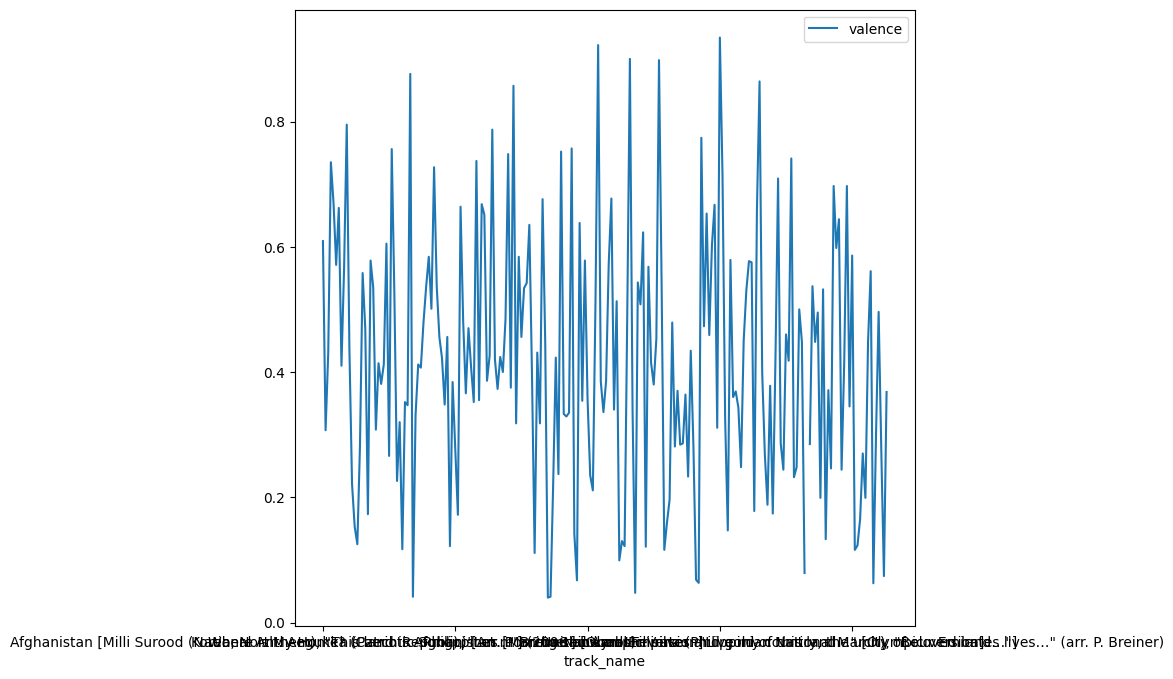

In [35]:
#plots valence and shows how different they are, so might be worth analysis
df_id_plus_details.plot(
    x='track_name',
    y='valence'
)

In [36]:
#function to get the country name

def get_country(x):
    try:
        
        country_bracket = x.replace(':', '[').split('[')[0]
        return country_bracket
    except:
        pass


df_id_plus_details['country']=df_id_plus_details.track_name.apply(get_country)

df_id_plus_details

key_0  danceability  energy   key  loudness  mode  \
0    4FfTEj2bSFa2ptNoxbkOnP          0.39    0.33  3.00    -13.63  1.00   
1    0J7T6WhEvtTTqvx4RRjpbq          0.42    0.12  7.00    -18.27  1.00   
2    05kY0EH7nF6Esa4yn0Mjsn          0.46    0.61  5.00    -13.71  1.00   
3    2hSwZOmc50GYJeOXe4C7vH          0.25    0.30 10.00    -15.65  1.00   
4    74NggutKEKI9FIMonXgRMi          0.54    0.21  2.00    -17.32  1.00   
..                      ...           ...     ...   ...       ...   ...   
209  7hGeCeMkGchfV6Y37lCPix          0.32    0.11  5.00    -17.03  1.00   
210  22n9XZJAuh8px5XoUo7vn1          0.29    0.24  7.00    -14.96  1.00   
211  4V7hADnXZWrimlEidbh9S8          0.17    0.27  7.00    -15.24  1.00   
212  6aTkj5V4xf8ZhW04diIet1          0.24    0.13 10.00    -15.52  1.00   
213  4ylVg9Pxvf2FXyo5uqhZj0          0.20    0.30  5.00    -13.52  1.00   

     speechiness  acousticness  instrumentalness  liveness  valence  tempo  \
0           0.03          0.80              0.98      0.12     0.61 125.87   
1           0.05          0.97              0.94      0.08     0.31  98.62   
2           0.05          0.86              0.94      0.21     0.43 127.96   
3           0.04          0.90              0.98      0.09     0.73  81.43   
4           0.04          0.84              0.89      0.10     0.67 102.54   
..           ...           ...               ...       ...      ...    ...   
209         0.03          0.94              0.91      0.11     0.30 115.44   
210         0.03          0.84              0.90      0.29     0.50  80.95   
211         0.04          0.75              0.97      0.13     0.28 152.85   
212         0.03          0.90              0.91      0.14     0.07  82.01   
213         0.04          0.75              0.90      0.18     0.37 141.06   

               type                      id  \
0    audio_features  4FfTEj2bSFa2ptNoxbkOnP   
1    audio_features  0J7T6WhEvtTTqvx4RRjpbq   
2    audio_features  05kY0EH7nF6Esa4yn0Mjsn   
3    audio_features  2hSwZOmc50GYJeOXe4C7vH   
4    audio_features  74NggutKEKI9FIMonXgRMi   
..              ...                     ...   
209  audio_features  7hGeCeMkGchfV6Y37lCPix   
210  audio_features  22n9XZJAuh8px5XoUo7vn1   
211  audio_features  4V7hADnXZWrimlEidbh9S8   
212  audio_features  6aTkj5V4xf8ZhW04diIet1   
213  audio_features  4ylVg9Pxvf2FXyo5uqhZj0   

                                      uri  \
0    spotify:track:4FfTEj2bSFa2ptNoxbkOnP   
1    spotify:track:0J7T6WhEvtTTqvx4RRjpbq   
2    spotify:track:05kY0EH7nF6Esa4yn0Mjsn   
3    spotify:track:2hSwZOmc50GYJeOXe4C7vH   
4    spotify:track:74NggutKEKI9FIMonXgRMi   
..                                    ...   
209  spotify:track:7hGeCeMkGchfV6Y37lCPix   
210  spotify:track:22n9XZJAuh8px5XoUo7vn1   
211  spotify:track:4V7hADnXZWrimlEidbh9S8   
212  spotify:track:6aTkj5V4xf8ZhW04diIet1   
213  spotify:track:4ylVg9Pxvf2FXyo5uqhZj0   

                                            track_href  \
0    https://api.spotify.com/v1/tracks/4FfTEj2bSFa2...   
1    https://api.spotify.com/v1/tracks/0J7T6WhEvtTT...   
2    https://api.spotify.com/v1/tracks/05kY0EH7nF6E...   
3    https://api.spotify.com/v1/tracks/2hSwZOmc50GY...   
4    https://api.spotify.com/v1/tracks/74NggutKEKI9...   
..                                                 ...   
209  https://api.spotify.com/v1/tracks/7hGeCeMkGchf...   
210  https://api.spotify.com/v1/tracks/22n9XZJAuh8p...   
211  https://api.spotify.com/v1/tracks/4V7hADnXZWri...   
212  https://api.spotify.com/v1/tracks/6aTkj5V4xf8Z...   
213  https://api.spotify.com/v1/tracks/4ylVg9Pxvf2F...   

                                          analysis_url  duration_ms  \
0    https://api.spotify.com/v1/audio-analysis/4FfT...    97,160.00   
1    https://api.spotify.com/v1/audio-analysis/0J7T...    69,653.00   
2    https://api.spotify.com/v1/audio-analysis/05kY...    67,733.00   
3    https://api.spotify.com/v1/audio-analysis/2hSw...    62,800.00   
4    https://api.spotify.c

In [37]:
df_id_plus_details.to_csv("df_id_plus_details.csv")

In [38]:
# df_id_plus_details = df_id_plus_details.reset_index()
# df_id_plus_details

# Flag Colours

### Source: 
https://fgeerolf.com/data/flags/index.html#flagColors_data

In [39]:
df_flag_colours=read_csv("flag_colours.csv")

In [40]:
df_flag_colours

country       c1       c2       c3       c4       c5       c6
0     Afghanistan  #000000  #009900  #BF0000  #D2534D  #DB8B70  #F4E5D7
1         Albania  #E41E20  #020000  #6F0F10  #AF1719      NaN      NaN
2         Algeria  #FFFFFF  #006233  #D21034  #EC99A8  #902A34  #DD4D68
3         Andorra  #D0103A  #0018A8  #FDDE00  #BBA373  #D9422D  #DFA41B
4          Angola  #CE1126  #000000  #F7D416  #97820D  #544807  #E3711E
..            ...      ...      ...      ...      ...      ...      ...
207     Hong Kong  #DE2408  #FFFFFF      NaN      NaN      NaN      NaN
208  OECD Members  #96BA13  #086199  #AFCDDB  #6F7173      NaN      NaN
209        Europe  #003399  #FFCC00      NaN      NaN      NaN      NaN
210     Hong Kong  #DE2408  #FFFFFF      NaN      NaN      NaN      NaN
211  OECD Members  #96BA13  #086199  #AFCDDB  #6F7173      NaN      NaN

[212 rows x 7 columns]

In [41]:
df_id_plus_details=df_id_plus_details.drop(columns=['key_0'])

In [42]:
df_details_plus_flag = pd.merge(df_id_plus_details, df_flag_colours, left_on=df_id_plus_details.country, right_on=df_flag_colours.country, how='left')
df_details_plus_flag


key_0  danceability  energy   key  loudness  mode  \
0        Afghanistan           0.39    0.33  3.00    -13.63  1.00   
1            Albania           0.42    0.12  7.00    -18.27  1.00   
2            Algeria           0.46    0.61  5.00    -13.71  1.00   
3     American Samoa           0.25    0.30 10.00    -15.65  1.00   
4            Andorra           0.54    0.21  2.00    -17.32  1.00   
..                ...           ...     ...   ...       ...   ...   
209             Yemen          0.32    0.11  5.00    -17.03  1.00   
210            Zambia          0.29    0.24  7.00    -14.96  1.00   
211          Zimbabwe          0.17    0.27  7.00    -15.24  1.00   
212    United Nations          0.24    0.13 10.00    -15.52  1.00   
213  Olympic Movement          0.20    0.30  5.00    -13.52  1.00   

     speechiness  acousticness  instrumentalness  liveness  valence  tempo  \
0           0.03          0.80              0.98      0.12     0.61 125.87   
1           0.05          0.97              0.94      0.08     0.31  98.62   
2           0.05          0.86              0.94      0.21     0.43 127.96   
3           0.04          0.90              0.98      0.09     0.73  81.43   
4           0.04          0.84              0.89      0.10     0.67 102.54   
..           ...           ...               ...       ...      ...    ...   
209         0.03          0.94              0.91      0.11     0.30 115.44   
210         0.03          0.84              0.90      0.29     0.50  80.95   
211         0.04          0.75              0.97      0.13     0.28 152.85   
212         0.03          0.90              0.91      0.14     0.07  82.01   
213         0.04          0.75              0.90      0.18     0.37 141.06   

               type                      id  \
0    audio_features  4FfTEj2bSFa2ptNoxbkOnP   
1    audio_features  0J7T6WhEvtTTqvx4RRjpbq   
2    audio_features  05kY0EH7nF6Esa4yn0Mjsn   
3    audio_features  2hSwZOmc50GYJeOXe4C7vH   
4    audio_features  74NggutKEKI9FIMonXgRMi   
..              ...                     ...   
209  audio_features  7hGeCeMkGchfV6Y37lCPix   
210  audio_features  22n9XZJAuh8px5XoUo7vn1   
211  audio_features  4V7hADnXZWrimlEidbh9S8   
212  audio_features  6aTkj5V4xf8ZhW04diIet1   
213  audio_features  4ylVg9Pxvf2FXyo5uqhZj0   

                                      uri  \
0    spotify:track:4FfTEj2bSFa2ptNoxbkOnP   
1    spotify:track:0J7T6WhEvtTTqvx4RRjpbq   
2    spotify:track:05kY0EH7nF6Esa4yn0Mjsn   
3    spotify:track:2hSwZOmc50GYJeOXe4C7vH   
4    spotify:track:74NggutKEKI9FIMonXgRMi   
..                                    ...   
209  spotify:track:7hGeCeMkGchfV6Y37lCPix   
210  spotify:track:22n9XZJAuh8px5XoUo7vn1   
211  spotify:track:4V7hADnXZWrimlEidbh9S8   
212  spotify:track:6aTkj5V4xf8ZhW04diIet1   
213  spotify:track:4ylVg9Pxvf2FXyo5uqhZj0   

                                            track_href  \
0    https://api.spotify.com/v1/tracks/4FfTEj2bSFa2...   
1    https://api.spotify.com/v1/tracks/0J7T6WhEvtTT...   
2    https://api.spotify.com/v1/tracks/05kY0EH7nF6E...   
3    https://api.spotify.com/v1/tracks/2hSwZOmc50GY...   
4    https://api.spotify.com/v1/tracks/74NggutKEKI9...   
..                                                 ...   
209  https://api.spotify.com/v1/tracks/7hGeCeMkGchf...   
210  https://api.spotify.com/v1/tracks/22n9XZJAuh8p...   
211  https://api.spotify.com/v1/tracks/4V7hADnXZWri...   
212  https://api.spotify.com/v1/tracks/6aTkj5V4xf8Z...   
213  https://api.spotify.com/v1/tracks/4ylVg9Pxvf2F...   

                                          analysis_url  duration_ms  \
0    https://api.spotify.com/v1/audio-analysis/4FfT...    97,160.00   
1    https://api.spotify.com/v1/audio-analysis/0J7T...    69,653.00   
2    https://api.spotify.com/v1/audio-analysis/05kY...    67,733.00   
3    https://api.spotify.com/v1/audio-analysis/2hSw...    62,800.00   
4    https://api.spotify.com/v1/audio-analysis/74Ng...    70,440.00   
..                   

In [43]:
# df_details_plus_flag.head(30)

In [44]:
df_anthem=read_csv('anthems.csv')
df_anthem['country_lower']=df_anthem['Country'].str.lower()
df_anthem

Country Alpha-2 Alpha-3 Continent  \
0           Albania      AL     ALB    Europe   
1           Armenia      AM     ARM    Europe   
2           Austria      AT     AUT    Europe   
3        Azerbaijan      AZ     AZE    Europe   
4           Belarus      BY     BLR    Europe   
..              ...     ...     ...       ...   
185         Tunisia      TN     TUN    Africa   
186          Uganda      UG     UGA    Africa   
187  Western Sahara      EH     ESH    Africa   
188          Zambia      ZM     ZMB    Africa   
189        Zimbabwe      ZW     ZWE    Africa   

                                                Anthem   country_lower  
0    Around our flag we stand united, With one wish...         albania  
1    Our Fatherland, free, independent, That has fo...         armenia  
2    Land of mountains, land by the river, Land of ...         austria  
3    Azerbaijan, Azerbaijan! The glorious Fatherlan...      azerbaijan  
4    We, Belarusians, are peaceful people, Wholehea...         belarus  
..                                                 ...             ...  
185  O defenders of the Homeland! Rally around to t...         tunisia  
186  Oh Uganda! May God uphold Thee, We lay our fut...          uganda  
187  O sons of the Sahara! In the battlefield, you ...  western sahara  
188  Stand and sing of Zambia, proud and free, Land...          zambia  
189  Oh lift high the banner, the flag of Zimbabwe ...        zimbabwe  

[190 rows x 6 columns]

In [45]:
df_details_plus_flag['country_y']=df_details_plus_flag['country_x'].str.lower()

df_details_plus_flag


key_0  danceability  energy   key  loudness  mode  \
0        Afghanistan           0.39    0.33  3.00    -13.63  1.00   
1            Albania           0.42    0.12  7.00    -18.27  1.00   
2            Algeria           0.46    0.61  5.00    -13.71  1.00   
3     American Samoa           0.25    0.30 10.00    -15.65  1.00   
4            Andorra           0.54    0.21  2.00    -17.32  1.00   
..                ...           ...     ...   ...       ...   ...   
209             Yemen          0.32    0.11  5.00    -17.03  1.00   
210            Zambia          0.29    0.24  7.00    -14.96  1.00   
211          Zimbabwe          0.17    0.27  7.00    -15.24  1.00   
212    United Nations          0.24    0.13 10.00    -15.52  1.00   
213  Olympic Movement          0.20    0.30  5.00    -13.52  1.00   

     speechiness  acousticness  instrumentalness  liveness  valence  tempo  \
0           0.03          0.80              0.98      0.12     0.61 125.87   
1           0.05          0.97              0.94      0.08     0.31  98.62   
2           0.05          0.86              0.94      0.21     0.43 127.96   
3           0.04          0.90              0.98      0.09     0.73  81.43   
4           0.04          0.84              0.89      0.10     0.67 102.54   
..           ...           ...               ...       ...      ...    ...   
209         0.03          0.94              0.91      0.11     0.30 115.44   
210         0.03          0.84              0.90      0.29     0.50  80.95   
211         0.04          0.75              0.97      0.13     0.28 152.85   
212         0.03          0.90              0.91      0.14     0.07  82.01   
213         0.04          0.75              0.90      0.18     0.37 141.06   

               type                      id  \
0    audio_features  4FfTEj2bSFa2ptNoxbkOnP   
1    audio_features  0J7T6WhEvtTTqvx4RRjpbq   
2    audio_features  05kY0EH7nF6Esa4yn0Mjsn   
3    audio_features  2hSwZOmc50GYJeOXe4C7vH   
4    audio_features  74NggutKEKI9FIMonXgRMi   
..              ...                     ...   
209  audio_features  7hGeCeMkGchfV6Y37lCPix   
210  audio_features  22n9XZJAuh8px5XoUo7vn1   
211  audio_features  4V7hADnXZWrimlEidbh9S8   
212  audio_features  6aTkj5V4xf8ZhW04diIet1   
213  audio_features  4ylVg9Pxvf2FXyo5uqhZj0   

                                      uri  \
0    spotify:track:4FfTEj2bSFa2ptNoxbkOnP   
1    spotify:track:0J7T6WhEvtTTqvx4RRjpbq   
2    spotify:track:05kY0EH7nF6Esa4yn0Mjsn   
3    spotify:track:2hSwZOmc50GYJeOXe4C7vH   
4    spotify:track:74NggutKEKI9FIMonXgRMi   
..                                    ...   
209  spotify:track:7hGeCeMkGchfV6Y37lCPix   
210  spotify:track:22n9XZJAuh8px5XoUo7vn1   
211  spotify:track:4V7hADnXZWrimlEidbh9S8   
212  spotify:track:6aTkj5V4xf8ZhW04diIet1   
213  spotify:track:4ylVg9Pxvf2FXyo5uqhZj0   

                                            track_href  \
0    https://api.spotify.com/v1/tracks/4FfTEj2bSFa2...   
1    https://api.spotify.com/v1/tracks/0J7T6WhEvtTT...   
2    https://api.spotify.com/v1/tracks/05kY0EH7nF6E...   
3    https://api.spotify.com/v1/tracks/2hSwZOmc50GY...   
4    https://api.spotify.com/v1/tracks/74NggutKEKI9...   
..                                                 ...   
209  https://api.spotify.com/v1/tracks/7hGeCeMkGchf...   
210  https://api.spotify.com/v1/tracks/22n9XZJAuh8p...   
211  https://api.spotify.com/v1/tracks/4V7hADnXZWri...   
212  https://api.spotify.com/v1/tracks/6aTkj5V4xf8Z...   
213  https://api.spotify.com/v1/tracks/4ylVg9Pxvf2F...   

                                          analysis_url  duration_ms  \
0    https://api.spotify.com/v1/audio-analysis/4FfT...    97,160.00   
1    https://api.spotify.com/v1/audio-analysis/0J7T...    69,653.00   
2    https://api.spotify.com/v1/audio-analysis/05kY...    67,733.00   
3    https://api.spotify.com/v1/audio-analysis/2hSw...    62,800.00   
4    https://api.spotify.com/v1/audio-analysis/74Ng...    70,440.00   
..                   

In [46]:
df_details_plus_flag=df_details_plus_flag.drop(columns=['key_0'])

In [47]:
df_details_plus_anthem = pd.merge(df_details_plus_flag, df_anthem, left_on=df_details_plus_flag.country_y, right_on=df_anthem.country_lower, how='left')
df_details_plus_anthem


key_0  danceability  energy   key  loudness  mode  \
0        afghanistan           0.39    0.33  3.00    -13.63  1.00   
1            albania           0.42    0.12  7.00    -18.27  1.00   
2            algeria           0.46    0.61  5.00    -13.71  1.00   
3     american samoa           0.25    0.30 10.00    -15.65  1.00   
4            andorra           0.54    0.21  2.00    -17.32  1.00   
..                ...           ...     ...   ...       ...   ...   
209             yemen          0.32    0.11  5.00    -17.03  1.00   
210            zambia          0.29    0.24  7.00    -14.96  1.00   
211          zimbabwe          0.17    0.27  7.00    -15.24  1.00   
212    united nations          0.24    0.13 10.00    -15.52  1.00   
213  olympic movement          0.20    0.30  5.00    -13.52  1.00   

     speechiness  acousticness  instrumentalness  liveness  valence  tempo  \
0           0.03          0.80              0.98      0.12     0.61 125.87   
1           0.05          0.97              0.94      0.08     0.31  98.62   
2           0.05          0.86              0.94      0.21     0.43 127.96   
3           0.04          0.90              0.98      0.09     0.73  81.43   
4           0.04          0.84              0.89      0.10     0.67 102.54   
..           ...           ...               ...       ...      ...    ...   
209         0.03          0.94              0.91      0.11     0.30 115.44   
210         0.03          0.84              0.90      0.29     0.50  80.95   
211         0.04          0.75              0.97      0.13     0.28 152.85   
212         0.03          0.90              0.91      0.14     0.07  82.01   
213         0.04          0.75              0.90      0.18     0.37 141.06   

               type                      id  \
0    audio_features  4FfTEj2bSFa2ptNoxbkOnP   
1    audio_features  0J7T6WhEvtTTqvx4RRjpbq   
2    audio_features  05kY0EH7nF6Esa4yn0Mjsn   
3    audio_features  2hSwZOmc50GYJeOXe4C7vH   
4    audio_features  74NggutKEKI9FIMonXgRMi   
..              ...                     ...   
209  audio_features  7hGeCeMkGchfV6Y37lCPix   
210  audio_features  22n9XZJAuh8px5XoUo7vn1   
211  audio_features  4V7hADnXZWrimlEidbh9S8   
212  audio_features  6aTkj5V4xf8ZhW04diIet1   
213  audio_features  4ylVg9Pxvf2FXyo5uqhZj0   

                                      uri  \
0    spotify:track:4FfTEj2bSFa2ptNoxbkOnP   
1    spotify:track:0J7T6WhEvtTTqvx4RRjpbq   
2    spotify:track:05kY0EH7nF6Esa4yn0Mjsn   
3    spotify:track:2hSwZOmc50GYJeOXe4C7vH   
4    spotify:track:74NggutKEKI9FIMonXgRMi   
..                                    ...   
209  spotify:track:7hGeCeMkGchfV6Y37lCPix   
210  spotify:track:22n9XZJAuh8px5XoUo7vn1   
211  spotify:track:4V7hADnXZWrimlEidbh9S8   
212  spotify:track:6aTkj5V4xf8ZhW04diIet1   
213  spotify:track:4ylVg9Pxvf2FXyo5uqhZj0   

                                            track_href  \
0    https://api.spotify.com/v1/tracks/4FfTEj2bSFa2...   
1    https://api.spotify.com/v1/tracks/0J7T6WhEvtTT...   
2    https://api.spotify.com/v1/tracks/05kY0EH7nF6E...   
3    https://api.spotify.com/v1/tracks/2hSwZOmc50GY...   
4    https://api.spotify.com/v1/tracks/74NggutKEKI9...   
..                                                 ...   
209  https://api.spotify.com/v1/tracks/7hGeCeMkGchf...   
210  https://api.spotify.com/v1/tracks/22n9XZJAuh8p...   
211  https://api.spotify.com/v1/tracks/4V7hADnXZWri...   
212  https://api.spotify.com/v1/tracks/6aTkj5V4xf8Z...   
213  https://api.spotify.com/v1/tracks/4ylVg9Pxvf2F...   

                                          analysis_url  duration_ms  \
0    https://api.spotify.com/v1/audio-analysis/4FfT...    97,160.00   
1    https://api.spotify.com/v1/audio-analysis/0J7T...    69,653.00   
2    https://api.spotify.com/v1/audio-analysis/05kY...    67,733.00   
3    https://api.spotify.com/v1/audio-analysis/2hSw...    62,800.00   
4    https://api.spotify.com/v1/audio-analysis/74Ng...    70,440.00   
..                   

In [48]:
# df_god_anthem=df_details_plus_anthem.query("Anthem.isin(['god','God','lord','Lord'])")
# df_god_anthem

In [49]:
#function to get the country name

def if_god_present(x):
    try:
        if 'god' in x or 'lord' in x or 'God' in x or "Lord" in x:
            result='present'
            return result
        else:
            result_absent='absent'
            return result_absent
    except:
        pass


df_details_plus_anthem['god']=df_details_plus_anthem.Anthem.apply(if_god_present)

df_details_plus_anthem

key_0  danceability  energy   key  loudness  mode  \
0        afghanistan           0.39    0.33  3.00    -13.63  1.00   
1            albania           0.42    0.12  7.00    -18.27  1.00   
2            algeria           0.46    0.61  5.00    -13.71  1.00   
3     american samoa           0.25    0.30 10.00    -15.65  1.00   
4            andorra           0.54    0.21  2.00    -17.32  1.00   
..                ...           ...     ...   ...       ...   ...   
209             yemen          0.32    0.11  5.00    -17.03  1.00   
210            zambia          0.29    0.24  7.00    -14.96  1.00   
211          zimbabwe          0.17    0.27  7.00    -15.24  1.00   
212    united nations          0.24    0.13 10.00    -15.52  1.00   
213  olympic movement          0.20    0.30  5.00    -13.52  1.00   

     speechiness  acousticness  instrumentalness  liveness  valence  tempo  \
0           0.03          0.80              0.98      0.12     0.61 125.87   
1           0.05          0.97              0.94      0.08     0.31  98.62   
2           0.05          0.86              0.94      0.21     0.43 127.96   
3           0.04          0.90              0.98      0.09     0.73  81.43   
4           0.04          0.84              0.89      0.10     0.67 102.54   
..           ...           ...               ...       ...      ...    ...   
209         0.03          0.94              0.91      0.11     0.30 115.44   
210         0.03          0.84              0.90      0.29     0.50  80.95   
211         0.04          0.75              0.97      0.13     0.28 152.85   
212         0.03          0.90              0.91      0.14     0.07  82.01   
213         0.04          0.75              0.90      0.18     0.37 141.06   

               type                      id  \
0    audio_features  4FfTEj2bSFa2ptNoxbkOnP   
1    audio_features  0J7T6WhEvtTTqvx4RRjpbq   
2    audio_features  05kY0EH7nF6Esa4yn0Mjsn   
3    audio_features  2hSwZOmc50GYJeOXe4C7vH   
4    audio_features  74NggutKEKI9FIMonXgRMi   
..              ...                     ...   
209  audio_features  7hGeCeMkGchfV6Y37lCPix   
210  audio_features  22n9XZJAuh8px5XoUo7vn1   
211  audio_features  4V7hADnXZWrimlEidbh9S8   
212  audio_features  6aTkj5V4xf8ZhW04diIet1   
213  audio_features  4ylVg9Pxvf2FXyo5uqhZj0   

                                      uri  \
0    spotify:track:4FfTEj2bSFa2ptNoxbkOnP   
1    spotify:track:0J7T6WhEvtTTqvx4RRjpbq   
2    spotify:track:05kY0EH7nF6Esa4yn0Mjsn   
3    spotify:track:2hSwZOmc50GYJeOXe4C7vH   
4    spotify:track:74NggutKEKI9FIMonXgRMi   
..                                    ...   
209  spotify:track:7hGeCeMkGchfV6Y37lCPix   
210  spotify:track:22n9XZJAuh8px5XoUo7vn1   
211  spotify:track:4V7hADnXZWrimlEidbh9S8   
212  spotify:track:6aTkj5V4xf8ZhW04diIet1   
213  spotify:track:4ylVg9Pxvf2FXyo5uqhZj0   

                                            track_href  \
0    https://api.spotify.com/v1/tracks/4FfTEj2bSFa2...   
1    https://api.spotify.com/v1/tracks/0J7T6WhEvtTT...   
2    https://api.spotify.com/v1/tracks/05kY0EH7nF6E...   
3    https://api.spotify.com/v1/tracks/2hSwZOmc50GY...   
4    https://api.spotify.com/v1/tracks/74NggutKEKI9...   
..                                                 ...   
209  https://api.spotify.com/v1/tracks/7hGeCeMkGchf...   
210  https://api.spotify.com/v1/tracks/22n9XZJAuh8p...   
211  https://api.spotify.com/v1/tracks/4V7hADnXZWri...   
212  https://api.spotify.com/v1/tracks/6aTkj5V4xf8Z...   
213  https://api.spotify.com/v1/tracks/4ylVg9Pxvf2F...   

                                          analysis_url  duration_ms  \
0    https://api.spotify.com/v1/audio-analysis/4FfT...    97,160.00   
1    https://api.spotify.com/v1/audio-analysis/0J7T...    69,653.00   
2    https://api.spotify.com/v1/audio-analysis/05kY...    67,733.00   
3    https://api.spotify.com/v1/audio-analysis/2hSw...    62,800.00   
4    https://api.spotify.com/v1/audio-analysis/74Ng...    70,440.00   
..                   

In [50]:
df_god_present=df_details_plus_anthem[(df_details_plus_anthem.god == 'present')]

In [51]:
df_details_plus_anthem.to_csv("df_details_plus_anthem.csv")

In [52]:
df_god_present.to_csv("df_god_present.csv")

# Some analysis:

Valence against presence of god in the word? <br />
Highest valence songs and lowest valence songs? <br />
Colony vs valence? <br />
Independence year vs valence? <br />
Anthem vs valence?


In [53]:
%%R

df_god_present_r <- read_csv('df_god_present.csv')

New names:
• `` -> `...1`
Rows: 58 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (23): key_0, type, id, uri, track_href, analysis_url, track_id, track_na...
dbl (14): ...1, danceability, energy, key, loudness, mode, speechiness, acou...
lgl  (1): error

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [54]:
%%R

df_details_plus_anthem_r <- read_csv('df_details_plus_anthem.csv')

New names:
• `` -> `...1`
Rows: 214 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (24): key_0, type, id, uri, track_href, analysis_url, error, track_id, t...
dbl (14): ...1, danceability, energy, key, loudness, mode, speechiness, acou...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


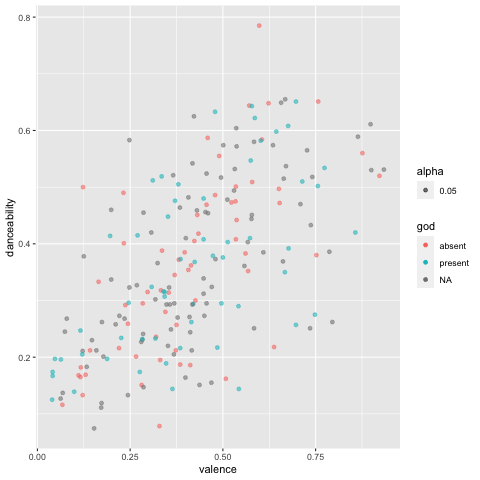

In [55]:
%%R

ggplot(df_details_plus_anthem_r) +
    aes(x=valence, y=danceability, color=god, alpha=.05) +
    geom_point() 
#     geom_vline(aes(xintercept=0), color='grey')

#The higher the valence the higher the danceability

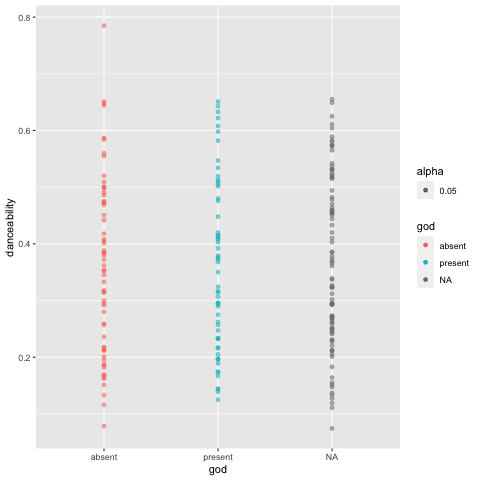

In [101]:
%%R

ggplot(df_details_plus_anthem_r) +
    aes(x=god, y=danceability, color=god, alpha=.05) +
    geom_point() 
#     geom_vline(aes(xintercept=0), color='grey')

#The higher the valence the higher the danceability

In [56]:
%%R
god_data_present_df_r <- df_details_plus_anthem_r %>%
    filter(god=='present' | god=='absent') # Filter data to polls for  Siena College/The New York Times Upshot only

god_data_present_df_r

# ggplot(god_data_present_df_r) +
#     aes(x=valence, y=god, alpha=.05) +
#     geom_point() 
# #     geom_vline(aes(xintercept=0), color='grey')

# A tibble: 120 × 38
    ...1 key_0        dance…¹ energy   key loudn…²  mode speec…³ acous…⁴ instr…⁵
   <dbl> <chr>          <dbl>  <dbl> <dbl>   <dbl> <dbl>   <dbl>   <dbl>   <dbl>
 1     5 angola         0.644  0.224     0   -18.4     1  0.0321   0.89    0.959
 2    19 belgium        0.501  0.11      7   -19.0     1  0.0334   0.931   0.913
 3    20 belize         0.324  0.178     5   -17.8     1  0.0357   0.919   0.923
 4    21 benin          0.362  0.375     0   -12.8     1  0.039    0.501   0.941
 5    22 bermuda        0.372  0.158     5   -16.9     1  0.0377   0.803   0.887
 6    23 bhutan         0.186  0.186    10   -16.0     1  0.0391   0.263   0.929
 7    24 bolivia        0.584  0.201     0   -17.5     1  0.0435   0.925   0.957
 8    25 bosnia and …   0.201  0.438     0   -13.3     1  0.0351   0.909   0.88 
 9    26 botswana       0.502  0.221     0   -16.8     1  0.0265   0.592   0.922
10    27 brazil         0.473  0.14     10   -18.4     1  0.0388   0.819   0.227
# … wit

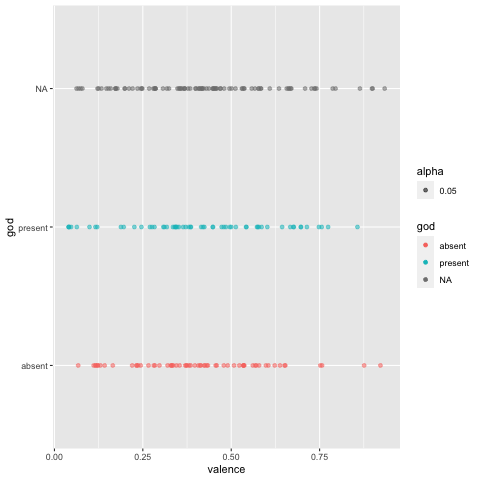

In [57]:
%%R

ggplot(df_details_plus_anthem_r) +
    aes(x=valence, y=god, color=god, alpha=.05) +
    geom_point() +
    geom_hline(aes(yintercept=mean(df_details_plus_anthem_r$valence)), color='grey')

#The higher the valence the higher the danceability

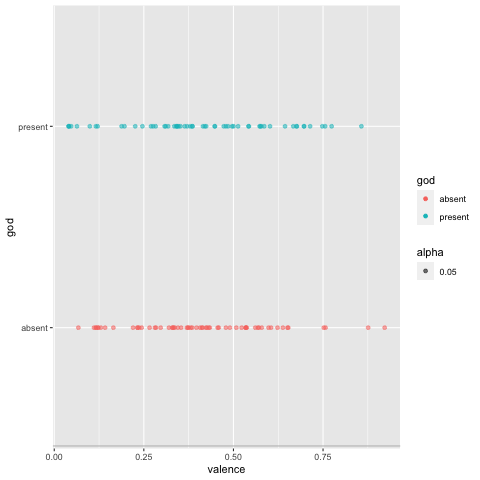

In [58]:
%%R

ggplot(god_data_present_df_r) +
    aes(x=valence, y=god, color=god, alpha=.05) +
    geom_point() +
    geom_hline(aes(yintercept=mean(god_data_present_df_r$valence)), color='grey')

#The higher the valence the higher the danceability

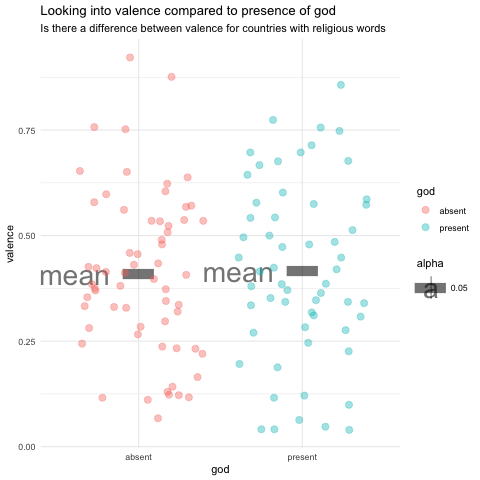

In [59]:
%%R 

ggplot(god_data_present_df_r) +
    aes(x=god, y=valence, color=god, alpha=.05) +
    # geom_point(size=4, alpha=.4) +
    stat_summary(fun=mean, geom='text', hjust=1.4, aes(label='mean'), color='black', size=10) +
    stat_summary(fun=mean, shape='-', color='black', size=10) +
    labs(title="Looking into valence compared to presence of god",
        subtitle="Is there a difference between valence for countries with religious words") +
    geom_jitter(size=3, alpha=0.4) +
    theme_minimal()


In [60]:
%%R 

god_present = god_data_present_df_r %>% filter(god=='present')
god_absent = god_data_present_df_r %>% filter(god=='absent')

t.test(god_present$valence, god_absent$valence)


	Welch Two Sample t-test

data:  god_present$valence and god_absent$valence
t = 0.19129, df = 115.07, p-value = 0.8486
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06574079  0.07979552
sample estimates:
mean of x mean of y 
0.4162741 0.4092468 



## P value is 0.8486 which is much larger than 0.05, meaning there is not much difference between the datasets

### The other values may have a difference: perhaps energy and danceability


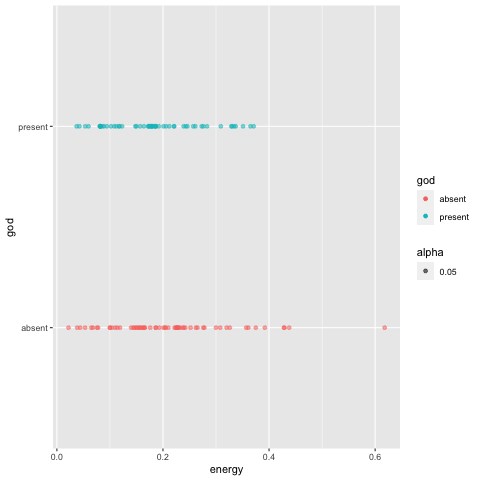

In [61]:
%%R

ggplot(god_data_present_df_r) +
    aes(x=energy, y=god, color=god, alpha=.05) +
    geom_point() +
    geom_hline(aes(yintercept=mean(god_data_present_df_r$energy)), color='grey')



In [62]:
%%R 

god_present = god_data_present_df_r %>% filter(god=='present')
god_absent = god_data_present_df_r %>% filter(god=='absent')

t.test(god_present$energy, god_absent$energy)


	Welch Two Sample t-test

data:  god_present$energy and god_absent$energy
t = -1.4368, df = 114.62, p-value = 0.1535
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06325090  0.01006881
sample estimates:
mean of x mean of y 
0.1834638 0.2100548 



## P value is 0.1535 which is slightly larger than 0.05, meaning the difference between the datasets is not statistically significant

### Now danceability


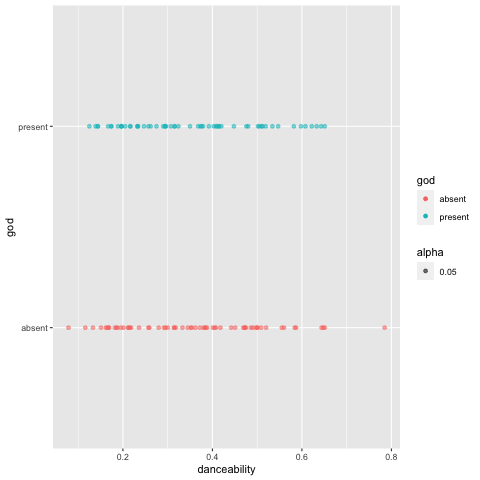

In [63]:
%%R

ggplot(god_data_present_df_r) +
    aes(x=danceability, y=god, color=god, alpha=.05) +
    geom_point() +
    geom_hline(aes(yintercept=mean(god_data_present_df_r$danceability)), color='grey')

In [64]:
%%R 

god_present = god_data_present_df_r %>% filter(god=='present')
god_absent = god_data_present_df_r %>% filter(god=='absent')

t.test(god_present$danceability, god_absent$danceability)


	Welch Two Sample t-test

data:  god_present$danceability and god_absent$danceability
t = -0.13382, df = 117.9, p-value = 0.8938
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05940334  0.05188320
sample estimates:
mean of x mean of y 
 0.357569  0.361329 



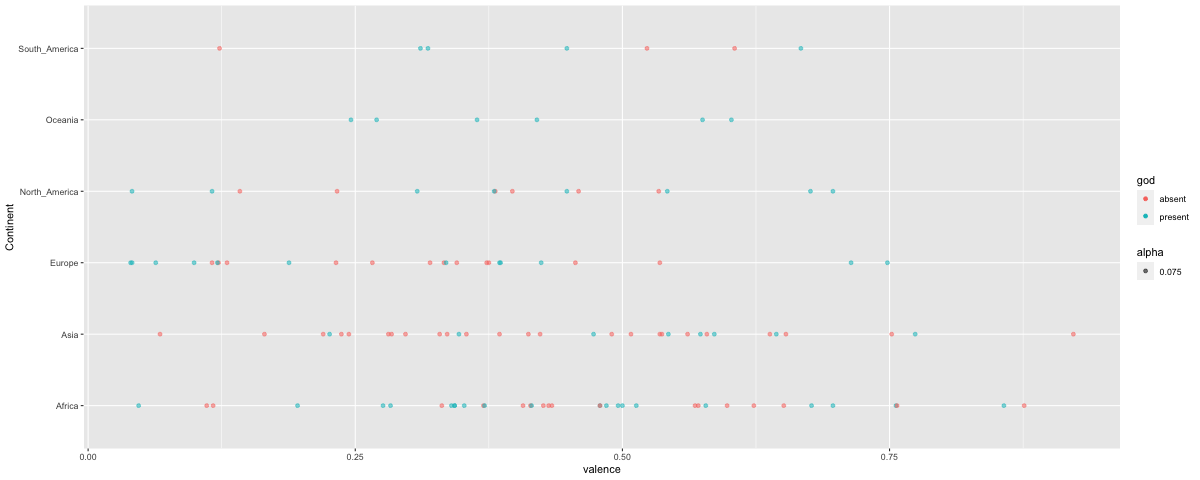

In [65]:
%%R -w 1200

ggplot(god_data_present_df_r) +
    aes(x=valence, y=Continent, color=god, alpha=.075) +
    geom_point() +
    geom_hline(aes(yintercept=mean(god_data_present_df_r$danceability)), color='grey')

In [66]:
%%R

god_data_present_df_r

# A tibble: 120 × 38
    ...1 key_0        dance…¹ energy   key loudn…²  mode speec…³ acous…⁴ instr…⁵
   <dbl> <chr>          <dbl>  <dbl> <dbl>   <dbl> <dbl>   <dbl>   <dbl>   <dbl>
 1     5 angola         0.644  0.224     0   -18.4     1  0.0321   0.89    0.959
 2    19 belgium        0.501  0.11      7   -19.0     1  0.0334   0.931   0.913
 3    20 belize         0.324  0.178     5   -17.8     1  0.0357   0.919   0.923
 4    21 benin          0.362  0.375     0   -12.8     1  0.039    0.501   0.941
 5    22 bermuda        0.372  0.158     5   -16.9     1  0.0377   0.803   0.887
 6    23 bhutan         0.186  0.186    10   -16.0     1  0.0391   0.263   0.929
 7    24 bolivia        0.584  0.201     0   -17.5     1  0.0435   0.925   0.957
 8    25 bosnia and …   0.201  0.438     0   -13.3     1  0.0351   0.909   0.88 
 9    26 botswana       0.502  0.221     0   -16.8     1  0.0265   0.592   0.922
10    27 brazil         0.473  0.14     10   -18.4     1  0.0388   0.819   0.227
# … wit

In [67]:
%%R 

god_data_present_df_r_asia = god_data_present_df_r %>% filter(Continent=='Asia')
god_data_present_df_r_africa = god_data_present_df_r %>% filter(Continent=='Africa')

t.test(god_data_present_df_r_asia$valence, god_data_present_df_r_africa$valence)


	Welch Two Sample t-test

data:  god_data_present_df_r_asia$valence and god_data_present_df_r_africa$valence
t = -0.31372, df = 65.643, p-value = 0.7547
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.10885233  0.07929237
sample estimates:
mean of x mean of y 
0.4492281 0.4640081 



## P value is 0.8938 which is much larger than 0.05, meaning there is not much difference between the datasets

### So check outliers

Use Python first since it is easier to annotate with

### Seems like there is something about:
1) the continents and valence, middle east and africa especially have higher valence <br />
2) africa and danceability <br />
3) (check god and africa) <br />
4) (check energy outliers) <br />
5) (check tails also)
6) uganda and malawi?

In [68]:
df_details_plus_anthem.sort_values(by='valence', ascending=False).head(1)

key_0  danceability  energy  key  loudness  mode  speechiness  \
150  philippines           0.53    0.26 5.00    -16.64  1.00         0.03   

     acousticness  instrumentalness  liveness  valence  tempo            type  \
150          0.94              0.91      0.08     0.93  99.41  audio_features   

                         id                                   uri  \
150  7cCFJPmm8apwwIoQ13uaNO  spotify:track:7cCFJPmm8apwwIoQ13uaNO   

                                            track_href  \
150  https://api.spotify.com/v1/tracks/7cCFJPmm8apw...   

                                          analysis_url  duration_ms  \
150  https://api.spotify.com/v1/audio-analysis/7cCF...    66,573.00   

     time_signature error                track_id  \
150            4.00   NaN  7cCFJPmm8apwwIoQ13uaNO   

                                            track_name     country_x  \
150  Philippines [Marcha Naciional Filipina (Philip...  Philippines    

        country_y   c1   c2   c3   c4   c5   c6 Country Alpha-2 Alpha-3  \
150  philippines   NaN  NaN  NaN  NaN  NaN  NaN     NaN     NaN     NaN   

    Continent Anthem country_lower   god  
150       NaN    NaN           NaN  None

In [69]:
df_details_plus_anthem.sort_values(by='danceability', ascending=False).head(1)

key_0  danceability  energy   key  loudness  mode  speechiness  \
194  tunisia          0.79    0.43 10.00    -14.99  1.00         0.04   

     acousticness  instrumentalness  liveness  valence  tempo            type  \
194          0.89              0.94      0.06     0.60 115.10  audio_features   

                         id                                   uri  \
194  6x0UtY6vZnKKYJK2ukM9tR  spotify:track:6x0UtY6vZnKKYJK2ukM9tR   

                                            track_href  \
194  https://api.spotify.com/v1/tracks/6x0UtY6vZnKK...   

                                          analysis_url  duration_ms  \
194  https://api.spotify.com/v1/audio-analysis/6x0U...    58,707.00   

     time_signature error                track_id  \
194            4.00   NaN  6x0UtY6vZnKKYJK2ukM9tR   

                                            track_name country_x country_y  \
194  Tunisia: O Defenders of the Homeland!… (arr. P...   Tunisia   tunisia   

          c1       c2       c3       c4       c5   c6  Country Alpha-2  \
194  #E70013  #FFFEFE  #F16C77  #F7ADB4  #EC3847  NaN  Tunisia      TN   

    Alpha-3 Continent                                             Anthem  \
194     TUN    Africa  O defenders of the Homeland! Rally around to t...   

    country_lower     god  
194       tunisia  absent

In [70]:
df_details_plus_anthem.sort_values(by='energy', ascending=False).head(1)

key_0  danceability  energy  key  loudness  mode  speechiness  \
145  palestine          0.47    0.62 5.00    -14.02  1.00         0.05   

     acousticness  instrumentalness  liveness  valence  tempo            type  \
145          0.79              0.77      0.12     0.65 102.77  audio_features   

                         id                                   uri  \
145  6j7xMzAUT1mGGcL14jf7jO  spotify:track:6j7xMzAUT1mGGcL14jf7jO   

                                            track_href  \
145  https://api.spotify.com/v1/tracks/6j7xMzAUT1mG...   

                                          analysis_url  duration_ms  \
145  https://api.spotify.com/v1/audio-analysis/6j7x...    65,867.00   

     time_signature error                track_id  \
145            3.00   NaN  6j7xMzAUT1mGGcL14jf7jO   

                                            track_name  country_x  country_y  \
145  Palestine: Fida'i (Revolutionary), "My country...  Palestine  palestine   

      c1   c2   c3   c4   c5   c6    Country Alpha-2 Alpha-3 Continent  \
145  NaN  NaN  NaN  NaN  NaN  NaN  Palestine      PS     PSE      Asia   

                                                Anthem country_lower     god  
145  Warrior, warrior, warrior, Oh my land, the lan...     palestine  absent

# From Datawrapper map

#### Only Kenya, Burundi, Iraq, Ukraine, Turkey etc have minor keys, anthems with minor keys are sadder

#### Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

#### Emotions evoked by common words and phrases: using mechanical turk to create an emotion lexicon

#### Top 5 danceable are in Africa

#### With the exception of trinidad and tobago and Costa Rica, top 10 most danceable anthems are african





In [71]:
df_details_plus_anthem.sort_values(by='danceability', ascending=False).head(10)

key_0  danceability  energy  \
194                                            tunisia          0.79    0.43   
60   let us tread the paths of our great happiness ...          0.66    0.29   
193                                trinidad and tobago          0.65    0.19   
94                                         ivory coast          0.65    0.24   
164                              são tome and principe          0.65    0.31   
121                                               mali          0.65    0.27   
5                                               angola          0.64    0.22   
99                                               kenya          0.64    0.09   
38                                                chad          0.63    0.19   
45           costa rican national anthem (costa rica)           0.62    0.10   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
194 10.00    -14.99  1.00         0.04          0.89              0.94   
60   9.00    -14.57  1.00         0.04          0.69              0.94   
193  5.00    -15.07  1.00         0.05          0.76              0.98   
94   7.00    -16.05  1.00         0.04          0.78              0.92   
164  3.00    -15.02  1.00         0.03          0.82              0.74   
121  7.00    -16.28  1.00         0.03          0.88              0.94   
5    0.00    -18.45  1.00         0.03          0.89              0.96   
99   9.00    -12.49  0.00         0.05          0.81              0.97   
38  10.00    -17.92  1.00         0.05          0.90              0.91   
45   3.00    -16.89  1.00         0.03          0.97              0.94   

     liveness  valence  tempo            type                      id  \
194      0.06     0.60 115.10  audio_features  6x0UtY6vZnKKYJK2ukM9tR   
60       0.07     0.67  94.63  audio_features  05hj7RXvEN2wtyMCMgJ0JH   
193      0.17     0.70 102.09  audio_features  0TJqTd2yNyAPZRY1c06XSd   
94       0.28     0.76  96.50  audio_features  2YdRwCSdJulOC9DZkjUBYu   
164      0.14     0.66 117.14  audio_features  7tLosJVGBo2KJ5EbCtUp7T   
121      0.06     0.62  97.23  audio_features  4YYszlixFbSDMsYzNZWA8P   
5        0.09     0.57 110.73  audio_features  7hrCjUIObTQcDhUe4GzkCI   
99       0.10     0.58  69.75  audio_features  5b4AFCtBCXQPhv1kZ6n1fA   
38       0.17     0.48 108.32  audio_features  59HrvgIEwqqPy5YJ2hACWK   
45       0.10     0.42 105.64  audio_features  61tCfzIFPISHpCSYPxnWNO   

                                      uri  \
194  spotify:track:6x0UtY6vZnKKYJK2ukM9tR   
60   spotify:track:05hj7RXvEN2wtyMCMgJ0JH   
193  spotify:track:0TJqTd2yNyAPZRY1c06XSd   
94   spotify:track:2YdRwCSdJulOC9DZkjUBYu   
164  spotify:track:7tLosJVGBo2KJ5EbCtUp7T   
121  spotify:track:4YYszlixFbSDMsYzNZWA8P   
5    spotify:track:7hrCjUIObTQcDhUe4GzkCI   
99   spotify:track:5b4AFCtBCXQPhv1kZ6n1fA   
38   spotify:track:59HrvgIEwqqPy5YJ2hACWK   
45   spotify:track:61tCfzIFPISHpCSYPxnWNO   

                                            track_href  \
194  https://api.spotify.com/v1/tracks/6x0UtY6vZnKK...   
60   https://api.spotify.com/v1/tracks/05hj7RXvEN2w...   
193  https://api.spotify.com/v1/tracks/0TJqTd2yNyAP...   
94   https://api.spotify.com/v1/tracks/2YdRwCSdJulO...   
164  https://api.spotify.com/v1/tracks/7tLosJVGBo2K...   
121  https://api.spotify.com/v1/tracks/4YYszlixFbSD...   
5    https://api.spotify.com/v1/tracks/7hrCjUIObTQc...   
99   https://api.spotify.com/v1/tracks/5b4AFCtBCXQP...   
38   https://api.spotify.com/v1/tracks/59HrvgIEwqqP...   
45   https://api.spotify.com/v1/tracks/61tCfzIFPISH...   

                                          analysis_url  duration_ms  \
194  https://api.spotify.com/v1/audio-analysis/6x0U...    58,707.00   
60   https://api.spotify.com/v1/audio-analysis/05hj...   106,840.00   
193  https://api.spotify.com/v1/audio-analysis/0TJq...    75,200.00   
94   https://api.spotify.com/v1/audio-analysis/2YdR...    76,347.00   
164  https://api.spotify.com/v1/audio-analysis/7tLo...    9

# Trying to analyse the text using NYT analysis of Trump speech

#### Source:
https://investigate.ai/upshot-trump-emolex/nrc-emotional-lexicon/

In [72]:
#Reading in
filepath = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t', keep_default_na=False)
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()


emotion         word  anger  anticipation  disgust  fear  joy  negative  \
0        abandonment    NaN           NaN      NaN   NaN  NaN      1.00   
1              abate   0.00          0.00     0.00  0.00 0.00      0.00   
2          abatement   0.00          0.00     0.00  0.00 0.00      0.00   
3               abba   0.00          0.00     0.00  0.00 0.00      0.00   
4              abbot   0.00          0.00     0.00  0.00 0.00      0.00   

emotion  positive  sadness  surprise  trust  
0            0.00     1.00      1.00   0.00  
1            0.00     0.00      0.00   0.00  
2            0.00     0.00      0.00   0.00  
3            1.00     0.00      0.00   0.00  
4            0.00     0.00      0.00   1.00

# Emotions covered

In [73]:
# emolex_df.emotion.unique()


In [74]:
# emolex_df.emotion.value_counts()


In [75]:
#How many words does each emotion have?#
# emolex_df[emolex_df.association == 1].emotion.value_counts()


In [76]:
# What if I just want the angry words?
# emolex_df[(emolex_df.association == 1) & (emolex_df.emotion == 'anger')].word


# Reshaping

In [77]:
# You can also reshape the data in order to look at it a slightly different way

# emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
# emolex_words.head()


In [78]:
# You can now pull out individual words...

# If you didn't reset_index you could do this more easily
# by doing emolex_words.loc['charitable']
# emolex_words[emolex_words.word == 'charitable']

In [79]:
# or individual emotions

# emolex_words[emolex_words.anger == 1].head()


In [80]:
#...or multiple emotions!

# emolex_words[(emolex_words.joy == 1) & (emolex_words.negative == 1)].head()

In [81]:
# The useful part is going to be just getting words for a single emotion.


# Angry words
# emolex_words[emolex_words.anger == 1].word

# How do anthems sound?

In [82]:
#creating mini dataframe where anthem is not empty

df_anthem_notna=df_details_plus_anthem[df_details_plus_anthem.Anthem.notna()]


In [83]:
# !pip install -U scikit-learn

In [84]:

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(df_anthem_notna.Anthem)
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()


abandonment  abate  abatement  abba  abbot  abbreviate  abbreviation  \
0         0.00   0.00       0.00  0.00   0.00        0.00          0.00   
1         0.00   0.00       0.00  0.00   0.00        0.00          0.00   
2         0.00   0.00       0.00  0.00   0.00        0.00          0.00   
3         0.00   0.00       0.00  0.00   0.00        0.00          0.00   
4         0.00   0.00       0.00  0.00   0.00        0.00          0.00   

   abdomen  abdominal  abduction  aberrant  aberration  abeyance  abhor  \
0     0.00       0.00       0.00      0.00        0.00      0.00   0.00   
1     0.00       0.00       0.00      0.00        0.00      0.00   0.00   
2     0.00       0.00       0.00      0.00        0.00      0.00   0.00   
3     0.00       0.00       0.00      0.00        0.00      0.00   0.00   
4     0.00       0.00       0.00      0.00        0.00      0.00   0.00   

   abhorrent  abide  ability  abject  ablation  ablaze  abnormal  aboard  \
0       0.00   0.00     0.00    0.00      0.00    0.00      0.00    0.00   
1       0.00   0.00     0.00    0.00      0.00    0.00      0.00    0.00   
2       0.00   0.00     0.00    0.00      0.00    0.00      0.00    0.00   
3       0.00   0.00     0.00    0.00      0.00    0.00      0.00    0.00   
4       0.00   0.00     0.00    0.00      0.00    0.00      0.00    0.00   

   abode  abolish  abolition  abominable  abomination  aboriginal  abort  \
0   0.00     0.00       0.00        0.00         0.00        0.00   0.00   
1   0.00     0.00       0.00        0.00         0.00        0.00   0.00   
2   0.00     0.00       0.00        0.00         0.00        0.00   0.00   
3   0.00     0.00       0.00        0.00         0.00        0.00   0.00   
4   0.00     0.00       0.00        0.00         0.00        0.00   0.00   

   abortion  abortive  abound  abovementioned  abrasion  abroad  abrogate  \
0      0.00      0.00    0.00            0.00      0.00    0.00      0.00   
1      0.00      0.00    0.00            0.00      0.00    0.00      0.00   
2      0.00      0.00    0.00            0.00      0.00    0.00      0.00   
3      0.00      0.00    0.00            0.00      0.00    0.00      0.00   
4      0.00      0.00    0.00            0.00      0.00    0.00      0.00   

   abrupt  abruptly  abscess  absence  absent  absentee  absenteeism  \
0    0.00      0.00     0.00     0.00    0.00      0.00         0.00   
1    0.00      0.00     0.00     0.00    0.00      0.00         0.00   
2    0.00      0.00     0.00     0.00    0.00      0.00         0.00   
3    0.00      0.00     0.00     0.00    0.00      0.00         0.00   
4    0.00      0.00     0.00     0.00    0.00      0.00         0.00   

   absinthe  absolute  absolution  absorbed  absorbent  absorbing  absorption  \
0      0.00      0.00        0.00      0.00       0.00       0.00        0.00   
1      0.00      0.00        0.00      0.00       0.00       0.00        0.00   
2      0.00      0.00        0.00      0.00       0.00       0.00        0.00   
3      0.00      0.00        0.00      0.00       0.00       0.00        0.00   
4      0.00      0.00        0.00      0.00       0.00       0.00        0.00   

   abstain  abstention  abstinence  abstract  abstraction  absurd  absurdity  \
0     0.00        0.00        0.00      0.00         0.00    0.00       0.00   
1     0.00        0.00        0.00      0.00         0.00    0.00       0.00   
2     0.00        0.00        0.00      0.00         0.00    0.00       0.00   
3     0.00        0.00        0.00      0.00         0.00    0.00       0.00   
4     0.00        0.00        0.00      0.00         0.00    0.00       0.00   

   abundance  abundant  abuse  abutment  aby  abysmal  abyss  academic  \
0       0.00      0.00   0.00      0.00 0.00     0.00   0.00      0.00   
1       0.00      0.00   0.00      0.00 0.00     0.00   0.00      0.00   
2       0.00      0.00   0.00      0.00 0.00     0.00   0.00      0.00   
3       0.02      0.00   0.

# Analysing negative vs positive 

In [85]:
# Get your list of positive words
positive_words = emolex_df[emolex_df.positive == 1]['word']

# Only give me the columns of positive words
df_anthem_notna['positivity'] = wordcount_df[positive_words].sum(axis=1)
# df_anthem_notna.head(3)

In [86]:
# Get your list of positive words
angry_words = emolex_df[emolex_df.anger == 1].word

# Only give me the columns of angry words
df_anthem_notna['anger'] = wordcount_df[angry_words].sum(axis=1)
# df_anthem_notna.head(3)

In [87]:
df_anthem_notna.to_csv("df_anthem_notna.csv")

In [88]:
# plotting
# ax = df_anthem_notna.plot(x='positivity', y='anger', kind='scatter')
# df_anthem_notna.plot(x='positivity', y='anger', kind='scatter', c='red', ax=ax)


# From Datawrapper analysis of negative vs positive

#### anthem positivity. In Africa, anthems of french colonies may be slightly less positive than those of british colonies. france itself?

In [89]:
%%R

df_anthem_notna_r <- read_csv('df_anthem_notna.csv')

New names:
• `` -> `...1`
Rows: 120 Columns: 40
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (23): key_0, type, id, uri, track_href, analysis_url, track_id, track_na...
dbl (16): ...1, danceability, energy, key, loudness, mode, speechiness, acou...
lgl  (1): error

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


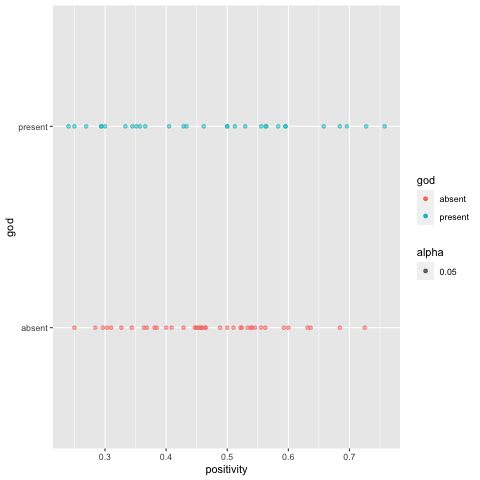

In [90]:
%%R

ggplot(df_anthem_notna_r) +
    aes(x=positivity, y=god, color=god, alpha=.05) +
    geom_point() +
    geom_hline(aes(yintercept=mean(df_anthem_notna_r$positivity)), color='grey')

In [91]:
%%R 

df_anthem_notna_r_god_present = df_anthem_notna_r %>% filter(god=='present')
df_anthem_notna_r_god_absent = df_anthem_notna_r %>% filter(god=='absent')

t.test(df_anthem_notna_r$positivity, df_anthem_notna_r$positivity)


	Welch Two Sample t-test

data:  df_anthem_notna_r$positivity and df_anthem_notna_r$positivity
t = 0, df = 136, p-value = 1
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04399223  0.04399223
sample estimates:
mean of x mean of y 
0.4686412 0.4686412 



# Analysing Sadness

In [92]:
# Get your list of sad words
sad_words = emolex_df[emolex_df.sadness == 1]['word']

# Only give me the columns of sad words
df_anthem_notna['sad'] = wordcount_df[sad_words].sum(axis=1)
# df_anthem_notna.head(3)

In [93]:
# Get your list of happy words
joy_words = emolex_df[emolex_df.joy == 1]['word']

# Only give me the columns of happy	 words
df_anthem_notna['joy'] = wordcount_df[joy_words].sum(axis=1)
# df_anthem_notna.head(3)

In [94]:
df_anthem_notna.to_csv("df_anthem_notna.csv")

In [95]:
%%R

df_anthem_notna_r <- read_csv('df_anthem_notna.csv')

New names:
• `` -> `...1`
Rows: 120 Columns: 42
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (23): key_0, type, id, uri, track_href, analysis_url, track_id, track_na...
dbl (18): ...1, danceability, energy, key, loudness, mode, speechiness, acou...
lgl  (1): error

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Sadness

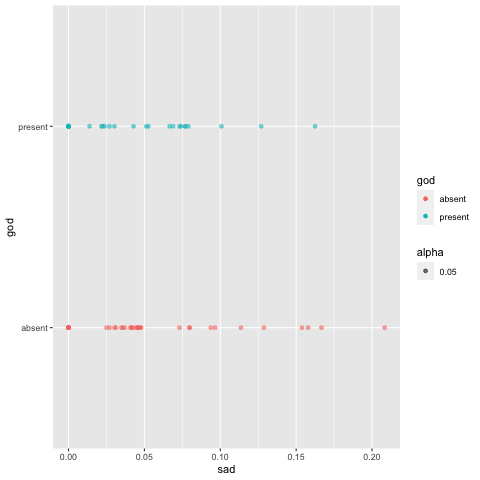

In [96]:
%%R

ggplot(df_anthem_notna_r) +
    aes(x=sad, y=god, color=god, alpha=.05) +
    geom_point() +
    geom_hline(aes(yintercept=mean(df_anthem_notna_r$sad)), color='grey')

In [97]:
%%R 

df_anthem_notna_r_god_present = df_anthem_notna_r %>% filter(god=='present')
df_anthem_notna_r_god_absent = df_anthem_notna_r %>% filter(god=='absent')

t.test(df_anthem_notna_r_god_present$sad, df_anthem_notna_r_god_absent$sad)


	Welch Two Sample t-test

data:  df_anthem_notna_r_god_present$sad and df_anthem_notna_r_god_absent$sad
t = -1.0362, df = 66.794, p-value = 0.3038
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03523144  0.01115235
sample estimates:
 mean of x  mean of y 
0.03973134 0.05177088 



# Joy

In [1]:
%%R

ggplot(df_anthem_notna_r) +
    aes(x=joy, y=god, color=god, alpha=.05) +
    geom_point() +
    geom_hline(aes(yintercept=mean(df_anthem_notna_r$joy)), color='grey')

UsageError: Cell magic `%%R` not found.


In [99]:
%%R 

df_anthem_notna_r_god_present = df_anthem_notna_r %>% filter(god=='present')
df_anthem_notna_r_god_absent = df_anthem_notna_r %>% filter(god=='absent')

t.test(df_anthem_notna_r_god_present$joy, df_anthem_notna_r_god_absent$joy)


	Welch Two Sample t-test

data:  df_anthem_notna_r_god_present$joy and df_anthem_notna_r_god_absent$joy
t = -0.15076, df = 56.694, p-value = 0.8807
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06653289  0.05721705
sample estimates:
mean of x mean of y 
0.2457740 0.2504319 



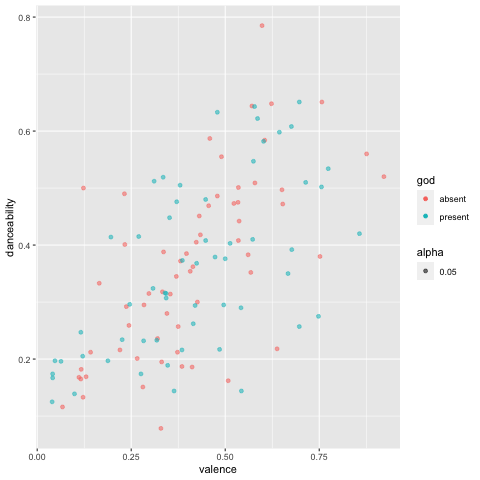

In [110]:
%%R

ggplot(df_anthem_notna_r) +
    aes(x=valence, y=danceability, color=god, alpha=.05) +
    geom_point() 
#     geom_vline(aes(xintercept=0), color='grey')

#The higher the valence the higher the danceability

In [114]:
df_anthem_notna.sort_values(by='joy', ascending=False).head(10)

key_0  danceability  energy   key  loudness  mode  speechiness  \
27          brazil          0.47    0.14 10.00    -18.38  1.00         0.04   
69          gambia          0.22    0.06  0.00    -19.66  1.00         0.04   
23          bhutan          0.19    0.19 10.00    -15.99  1.00         0.04   
112  liechtenstein          0.14    0.17  5.00    -17.51  1.00         0.03   
21           benin          0.36    0.38  0.00    -12.76  1.00         0.04   
118         malawi          0.20    0.09  5.00    -17.25  1.00         0.05   
32        cambodia          0.19    0.12  5.00    -16.26  1.00         0.03   
22         bermuda          0.37    0.16  5.00    -16.94  1.00         0.04   
72           ghana          0.42    0.33  8.00    -14.98  1.00         0.03   
109        lesotho          0.39    0.22 10.00    -15.07  1.00         0.03   

     acousticness  instrumentalness  liveness  valence  tempo            type  \
27           0.82              0.23      0.36     0.52 122.84  audio_features   
69           0.95              0.97      0.16     0.48  80.49  audio_features   
23           0.26              0.93      0.13     0.41  87.81  audio_features   
112          0.88              0.92      0.10     0.10  71.27  audio_features   
21           0.50              0.94      0.11     0.41 101.33  audio_features   
118          0.98              0.88      0.10     0.05  66.64  audio_features   
32           0.87              0.91      0.11     0.35  99.25  audio_features   
22           0.80              0.89      0.22     0.38  89.15  audio_features   
72           0.79              0.88      0.11     0.86  94.72  audio_features   
109          0.69              0.50      0.32     0.68  76.66  audio_features   

                         id                                   uri  \
27   5yyBDd13Zb7eoVT86NPhO2  spotify:track:5yyBDd13Zb7eoVT86NPhO2   
69   0Mz1hdObfCn0cJvaGTrmJ4  spotify:track:0Mz1hdObfCn0cJvaGTrmJ4   
23   6n28Uuqq0oP4Dv4ekTXcBI  spotify:track:6n28Uuqq0oP4Dv4ekTXcBI   
112  16NXI15cDBZXNppD2o5WFF  spotify:track:16NXI15cDBZXNppD2o5WFF   
21   3FZAqRf9D0B9yaK6U6kK3m  spotify:track:3FZAqRf9D0B9yaK6U6kK3m   
118  3hRhoFIkeaoOBoS6Zo35Kg  spotify:track:3hRhoFIkeaoOBoS6Zo35Kg   
32   670dxFo13rtkt0RvOyP1qy  spotify:track:670dxFo13rtkt0RvOyP1qy   
22   5FuQ1wUveHPYAxHmqAiutP  spotify:track:5FuQ1wUveHPYAxHmqAiutP   
72   5QkDamosnSLX03ZC8zX7aq  spotify:track:5QkDamosnSLX03ZC8zX7aq   
109  1SqnpSWvzUZKZUmEpzOoIF  spotify:track:1SqnpSWvzUZKZUmEpzOoIF   

                                            track_href  \
27   https://api.spotify.com/v1/tracks/5yyBDd13Zb7e...   
69   https://api.spotify.com/v1/tracks/0Mz1hdObfCn0...   
23   https://api.spotify.com/v1/tracks/6n28Uuqq0oP4...   
112  https://api.spotify.com/v1/tracks/16NXI15cDBZX...   
21   https://api.spotify.com/v1/tracks/3FZAqRf9D0B9...   
118  https://api.spotify.com/v1/tracks/3hRhoFIkeaoO...   
32   https://api.spotify.com/v1/tracks/670dxFo13rtk...   
22   https://api.spotify.com/v1/tracks/5FuQ1wUveHPY...   
72   https://api.spotify.com/v1/tracks/5QkDamosnSLX...   
109  https://api.spotify.com/v1/tracks/1SqnpSWvzUZK...   

                                          analysis_url  duration_ms  \
27   https://api.spotify.com/v1/audio-analysis/5yyB...    85,027.00   
69   https://api.spotify.com/v1/audio-analysis/0Mz1...    70,920.00   
23   https://api.spotify.com/v1/audio-analysis/6n28...    59,000.00   
112  https://api.spotify.com/v1/audio-analysis/16NX...    78,747.00   
21   https://api.spotify.com/v1/audio-analysis/3FZA...    80,000.00   
118  https://api.spotify.com/v1/audio-analysis/3hRh...    69,560.00   
32   https://api.spotify.com/v1/audio-analysis/670d...   127,800.00   
22   https://api.spotify.com/v1/audio-analysis/5FuQ...    56,120.00   
72   https://api.spotify.com/v1/audio-analysis/5QkD...    58,653.00   
109  https://api.spotify.com/v1/audio-analysis/1Sqn...    56,733.00   

     time_signature error                track_id  \
27             4.

In [115]:
df_anthem_notna.sort_values(by='sad', ascending=False).head(10)

key_0  danceability  energy   key  loudness  mode  speechiness  \
76       greenland          0.47    0.02  0.00    -17.90  1.00         0.04   
89            iran          0.29    0.15  7.00    -17.29  1.00         0.04   
112  liechtenstein          0.14    0.17  5.00    -17.51  1.00         0.03   
61         eritrea          0.50    0.23  5.00    -14.78  1.00         0.03   
94     ivory coast          0.65    0.24  7.00    -16.05  1.00         0.04   
92          israel          0.08    0.10  2.00    -21.25  0.00         0.03   
38            chad          0.63    0.19 10.00    -17.92  1.00         0.05   
105     kyrgyzstan          0.19    0.17  9.00    -16.52  1.00         0.04   
93           italy          0.52    0.18 10.00    -18.33  1.00         0.05   
106           laos          0.39    0.15  5.00    -16.93  1.00         0.05   

     acousticness  instrumentalness  liveness  valence  tempo            type  \
76           0.97              0.96      0.11     0.53 119.48  audio_features   
89           0.80              0.93      0.10     0.24 136.88  audio_features   
112          0.88              0.92      0.10     0.10  71.27  audio_features   
61           0.83              0.96      0.15     0.65  83.48  audio_features   
94           0.78              0.92      0.28     0.76  96.50  audio_features   
92           0.74              0.81      0.07     0.33  68.53  audio_features   
38           0.90              0.91      0.17     0.48 108.32  audio_features   
105          0.66              0.56      0.09     0.39 163.41  audio_features   
93           0.91              0.90      0.34     0.34 108.05  audio_features   
106          0.87              0.85      0.19     0.34 120.92  audio_features   

                         id                                   uri  \
76   0b0clBBEoH8sp9TOcXxUqN  spotify:track:0b0clBBEoH8sp9TOcXxUqN   
89   3e2KYjwBoAxPvTwWHZ6wED  spotify:track:3e2KYjwBoAxPvTwWHZ6wED   
112  16NXI15cDBZXNppD2o5WFF  spotify:track:16NXI15cDBZXNppD2o5WFF   
61   4c9Kt9NDrVoYkZqEV5kqez  spotify:track:4c9Kt9NDrVoYkZqEV5kqez   
94   2YdRwCSdJulOC9DZkjUBYu  spotify:track:2YdRwCSdJulOC9DZkjUBYu   
92   6cuzFOMRGtAMXRIJhwoHjZ  spotify:track:6cuzFOMRGtAMXRIJhwoHjZ   
38   59HrvgIEwqqPy5YJ2hACWK  spotify:track:59HrvgIEwqqPy5YJ2hACWK   
105  0MojoACMmhtiH8iqFcy2l2  spotify:track:0MojoACMmhtiH8iqFcy2l2   
93   34CP2srPrDwymC15CK34he  spotify:track:34CP2srPrDwymC15CK34he   
106  6vb3OQNEGDgg6SJQDmzDNK  spotify:track:6vb3OQNEGDgg6SJQDmzDNK   

                                            track_href  \
76   https://api.spotify.com/v1/tracks/0b0clBBEoH8s...   
89   https://api.spotify.com/v1/tracks/3e2KYjwBoAxP...   
112  https://api.spotify.com/v1/tracks/16NXI15cDBZX...   
61   https://api.spotify.com/v1/tracks/4c9Kt9NDrVoY...   
94   https://api.spotify.com/v1/tracks/2YdRwCSdJulO...   
92   https://api.spotify.com/v1/tracks/6cuzFOMRGtAM...   
38   https://api.spotify.com/v1/tracks/59HrvgIEwqqP...   
105  https://api.spotify.com/v1/tracks/0MojoACMmhti...   
93   https://api.spotify.com/v1/tracks/34CP2srPrDwy...   
106  https://api.spotify.com/v1/tracks/6vb3OQNEGDgg...   

                                          analysis_url  duration_ms  \
76   https://api.spotify.com/v1/audio-analysis/0b0c...    44,160.00   
89   https://api.spotify.com/v1/audio-analysis/3e2K...    71,200.00   
112  https://api.spotify.com/v1/audio-analysis/16NX...    78,747.00   
61   https://api.spotify.com/v1/audio-analysis/4c9K...    68,613.00   
94   https://api.spotify.com/v1/audio-analysis/2YdR...    76,347.00   
92   https://api.spotify.com/v1/audio-analysis/6cuz...    86,813.00   
38   https://api.spotify.com/v1/audio-analysis/59Hr...    79,853.00   
105  https://api.spotify.com/v1/audio-analysis/0Moj...    61,907.00   
93   https://api.spotify.com/v1/audio-analysis/34CP...   107,493.00   
106  https://api.spotify.com/v1/audio-analysis/6vb3...    84,867.00   

     time_signature error                track_id  \
76             4.

In [117]:
df_anthem_notna.sort_values(by='anger', ascending=False).head(10)

key_0  danceability  energy   key  loudness  mode  \
89                     iran          0.29    0.15  7.00    -17.29  1.00   
65                     fiji          0.29    0.19 10.00    -13.77  1.00   
112           liechtenstein          0.14    0.17  5.00    -17.51  1.00   
93                    italy          0.52    0.18 10.00    -18.33  1.00   
25   bosnia and herzegovina          0.20    0.44  0.00    -13.27  1.00   
98               kazakhstan          0.31    0.33  7.00    -14.39  1.00   
61                  eritrea          0.50    0.23  5.00    -14.78  1.00   
86                  iceland          0.17    0.05 10.00    -23.20  1.00   
33                 cameroon          0.56    0.19 10.00    -14.55  1.00   
111                   libya          0.40    0.21  7.00    -14.88  1.00   

     speechiness  acousticness  instrumentalness  liveness  valence  tempo  \
89          0.04          0.80              0.93      0.10     0.24 136.88   
65          0.03          0.92              0.85      0.10     0.42 101.82   
112         0.03          0.88              0.92      0.10     0.10  71.27   
93          0.05          0.91              0.90      0.34     0.34 108.05   
25          0.04          0.91              0.88      0.26     0.27  99.35   
98          0.04          0.89              0.76      0.12     0.35  99.03   
61          0.03          0.83              0.96      0.15     0.65  83.48   
86          0.05          0.98              0.90      0.12     0.04 128.99   
33          0.03          0.89              0.83      0.18     0.88 101.51   
111         0.03          0.66              0.82      0.08     0.51  95.75   

               type                      id  \
89   audio_features  3e2KYjwBoAxPvTwWHZ6wED   
65   audio_features  3h5iUCG7xK78XOM5uY9Mr6   
112  audio_features  16NXI15cDBZXNppD2o5WFF   
93   audio_features  34CP2srPrDwymC15CK34he   
25   audio_features  1zD33DhCqOj3qQHvFiFqYF   
98   audio_features  1QJWhZ5HwOSpBkJe9QDwLA   
61   audio_features  4c9Kt9NDrVoYkZqEV5kqez   
86   audio_features  32OORRcSQDB9K9d2lrq4Yr   
33   audio_features  4Tem0Yd4m5lcv2eAZEY6t0   
111  audio_features  3rxzgSlXG8sIYPMajR9nFN   

                                      uri  \
89   spotify:track:3e2KYjwBoAxPvTwWHZ6wED   
65   spotify:track:3h5iUCG7xK78XOM5uY9Mr6   
112  spotify:track:16NXI15cDBZXNppD2o5WFF   
93   spotify:track:34CP2srPrDwymC15CK34he   
25   spotify:track:1zD33DhCqOj3qQHvFiFqYF   
98   spotify:track:1QJWhZ5HwOSpBkJe9QDwLA   
61   spotify:track:4c9Kt9NDrVoYkZqEV5kqez   
86   spotify:track:32OORRcSQDB9K9d2lrq4Yr   
33   spotify:track:4Tem0Yd4m5lcv2eAZEY6t0   
111  spotify:track:3rxzgSlXG8sIYPMajR9nFN   

                                            track_href  \
89   https://api.spotify.com/v1/tracks/3e2KYjwBoAxP...   
65   https://api.spotify.com/v1/tracks/3h5iUCG7xK78...   
112  https://api.spotify.com/v1/tracks/16NXI15cDBZX...   
93   https://api.spotify.com/v1/tracks/34CP2srPrDwy...   
25   https://api.spotify.com/v1/tracks/1zD33DhCqOj3...   
98   https://api.spotify.com/v1/tracks/1QJWhZ5HwOSp...   
61   https://api.spotify.com/v1/tracks/4c9Kt9NDrVoY...   
86   https://api.spotify.com/v1/tracks/32OORRcSQDB9...   
33   https://api.spotify.com/v1/tracks/4Tem0Yd4m5lc...   
111  https://api.spotify.com/v1/tracks/3rxzgSlXG8sI...   

                                          analysis_url  duration_ms  \
89   https://api.spotify.com/v1/audio-analysis/3e2K...    71,200.00   
65   https://api.spotify.com/v1/audio-analysis/3h5i...    86,107.00   
112  https://api.spotify.com/v1/audio-analysis/16NX...    78,747.00   
93   https://api.spotify.com/v1/audio-analysis/34CP...   107,493.00   
25   https://api.spotify.com/v1/audio-analysis/1zD3...    80,653.00   
98   https://api.spotify.com/v1/audio-analysis/1QJW...    72,173.00   
61   https://api.spotify.com/v1/audio-analysis/4c9K...    68,613.00   
86   https://api.spotify.com/v1/audio-analysis/32OO...    86,787.00   
33   https://api.spotify.com/v1/audio-analysi

In [118]:
df_anthem_notna.sort_values(by='positivity', ascending=False).head(10)

key_0  danceability  energy   key  loudness  mode  speechiness  \
119  malaysia          0.14    0.31  5.00    -15.56  1.00         0.04   
26   botswana          0.50    0.22  0.00    -16.80  1.00         0.03   
23     bhutan          0.19    0.19 10.00    -15.99  1.00         0.04   
69     gambia          0.22    0.06  0.00    -19.66  1.00         0.04   
87      india          0.22    0.26  3.00    -16.88  1.00         0.04   
32   cambodia          0.19    0.12  5.00    -16.26  1.00         0.03   
118    malawi          0.20    0.09  5.00    -17.25  1.00         0.05   
21      benin          0.36    0.38  0.00    -12.76  1.00         0.04   
80     guinea          0.17    0.15  7.00    -17.09  1.00         0.04   
27     brazil          0.47    0.14 10.00    -18.38  1.00         0.04   

     acousticness  instrumentalness  liveness  valence  tempo            type  \
119          0.65              0.90      0.09     0.54 148.48  audio_features   
26           0.59              0.92      0.08     0.76  51.68  audio_features   
23           0.26              0.93      0.13     0.41  87.81  audio_features   
69           0.95              0.97      0.16     0.48  80.49  audio_features   
87           0.63              0.85      0.12     0.22 115.03  audio_features   
32           0.87              0.91      0.11     0.35  99.25  audio_features   
118          0.98              0.88      0.10     0.05  66.64  audio_features   
21           0.50              0.94      0.11     0.41 101.33  audio_features   
80           0.96              0.79      0.10     0.11 102.16  audio_features   
27           0.82              0.23      0.36     0.52 122.84  audio_features   

                         id                                   uri  \
119  3cCmOupy4944LwUFJK7aH2  spotify:track:3cCmOupy4944LwUFJK7aH2   
26   7bc84oCI9dwdNb9zMAx1Lk  spotify:track:7bc84oCI9dwdNb9zMAx1Lk   
23   6n28Uuqq0oP4Dv4ekTXcBI  spotify:track:6n28Uuqq0oP4Dv4ekTXcBI   
69   0Mz1hdObfCn0cJvaGTrmJ4  spotify:track:0Mz1hdObfCn0cJvaGTrmJ4   
87   1OBrv2snr11uCQUZaEx9iU  spotify:track:1OBrv2snr11uCQUZaEx9iU   
32   670dxFo13rtkt0RvOyP1qy  spotify:track:670dxFo13rtkt0RvOyP1qy   
118  3hRhoFIkeaoOBoS6Zo35Kg  spotify:track:3hRhoFIkeaoOBoS6Zo35Kg   
21   3FZAqRf9D0B9yaK6U6kK3m  spotify:track:3FZAqRf9D0B9yaK6U6kK3m   
80   41XK7TFpKjSBkDwv5syuOa  spotify:track:41XK7TFpKjSBkDwv5syuOa   
27   5yyBDd13Zb7eoVT86NPhO2  spotify:track:5yyBDd13Zb7eoVT86NPhO2   

                                            track_href  \
119  https://api.spotify.com/v1/tracks/3cCmOupy4944...   
26   https://api.spotify.com/v1/tracks/7bc84oCI9dwd...   
23   https://api.spotify.com/v1/tracks/6n28Uuqq0oP4...   
69   https://api.spotify.com/v1/tracks/0Mz1hdObfCn0...   
87   https://api.spotify.com/v1/tracks/1OBrv2snr11u...   
32   https://api.spotify.com/v1/tracks/670dxFo13rtk...   
118  https://api.spotify.com/v1/tracks/3hRhoFIkeaoO...   
21   https://api.spotify.com/v1/tracks/3FZAqRf9D0B9...   
80   https://api.spotify.com/v1/tracks/41XK7TFpKjSB...   
27   https://api.spotify.com/v1/tracks/5yyBDd13Zb7e...   

                                          analysis_url  duration_ms  \
119  https://api.spotify.com/v1/audio-analysis/3cCm...    86,867.00   
26   https://api.spotify.com/v1/audio-analysis/7bc8...    84,520.00   
23   https://api.spotify.com/v1/audio-analysis/6n28...    59,000.00   
69   https://api.spotify.com/v1/audio-analysis/0Mz1...    70,920.00   
87   https://api.spotify.com/v1/audio-analysis/1OBr...    64,720.00   
32   https://api.spotify.com/v1/audio-analysis/670d...   127,800.00   
118  https://api.spotify.com/v1/audio-analysis/3hRh...    69,560.00   
21   https://api.spotify.com/v1/audio-analysis/3FZA...    80,000.00   
80   https://api.spotify.com/v1/audio-analysis/41XK...    89,853.00   
27   https://api.spotify.com/v1/audio-analysis/5yyB...    85,027.00   

     time_signature error                track_id  \
119            4.00   NaN  3cCmOupy4944LwUFJK7aH2   
26            

In [ ]:
%%R 

